# Setup

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from matplotlib import figure
from scipy import stats
from matplotlib_venn import venn2
import math
import admix #see for instructions on installing this package at https://github.com/KangchengHou/admix-kit
from SimulationSetup import *
from RealDataSetup import *

In [2]:
#for style
plt.style.use("seaborn")
size = 25
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('font', size=size) #controls default text size
plt.rc('axes', titlesize=size+10) #fontsize of the title
plt.rc('axes', labelsize=size+10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=size) #fontsize of the y tick labels
plt.rc('legend', fontsize=size) #fontsize of the legend
plt.rc('legend', edgecolor="black")
sns.set_style("white") #make background white instead of grid

In [3]:
#directories
sim_dir = "../sim_data" #output of association tests
real_dir_geno = "/u/project/sgss/UKBB/UKB-ADMIXED/01-dataset/out/PLINK2/imputed" #real genotypes directory
real_dir_rls = "../results" #real results directory
info_dir = "../sim_data/info" #information about real data

## Simulated Data

In [ ]:
#simulate admixed genotypes with specific properties
'''
This will create single-snp simulated admixed genotypes using the properties as follows:
- freq1 (allele frequency in ancestry 1)
- freq2 (allele frequency in ancestry 2)
- global_ancestry (the proportion of ancestry 1 in the population)
- sim_dir (the directory in which to save the genotypes)
- n_indiv (the number of individuals for which to create genotypes)
- sd_theta (the standard deviation of global ancestry proportion 1 in the population; set to 0.125 if blank)
'''
SimulationSetup.create_genotypes(freq1, freq2, global_ancestry, sim_dir, n_indiv, sd_theta)

#the results will be saved in these files
dir_name = f"{sim_dir}/{freq1}_{freq2}_{global_ancestry}_{n_indiv}"
genotype_file = f"{dir_name}/geno.csv.gz"
localancestry_file = f"{dir_name}/lanc.csv.gz"
globalancestry_file = f"{dir_name}/theta.csv.gz"

#simulate quantitative phenotypes and run GWAS on simulated data (Figure 2 c-d, Figure 3a, Figures S1-8)
'''
This will use the simulated genotypes created above and save a results file to the file location re-iterated below.  The parameters are as follows:

- R_het (the ratio beta1/beta2)
- freq1 (allele frequency of the causal allele in ancestry 1)
- freq2 (allele frequency of the causal allele in ancestry 2)
- global_ancestry (the proportion of ancestry 1 in the population)
- seed (a random seed for generating phenotypes)
- n_pheno (the number of times to run the simulation)
- sim_dir (the directory in which to retrieve genotypes and save phenotypes)
- n_indiv (the number of individuals for the study)
- h2 (heritability; set to 0.005 if blank)
- abs_beta (beta2; set to 1.0 if blank)
- pthresh (the pvalue threshold for significance; set to 5e-8 if blank)
'''

SimulationSetup.simulate_specific_ind(R_het, freq1, freq2, global_ancestry, seed, n_pheno, sim_dir, n_indiv, h2, abs_beta, pthresh)

#the results will be in the following directory
rls_dir = f"{sim_dir}/{freq1}_{freq2}_{p_1}_{n_indiv}/{beta1}_{beta2}"
    if abs_beta != 1.0:
        rls_dir = rls_dir + f"_ab_{abs_beta}"
    if h2 != 0.005:
        rls_dir = rls_dir + f"_h2_{h2}"
rls_file = f"{rls_dir}_rls.csv.gz"

#run ADM on simulated data (Figure S4 only)
'''
This will use the simulated genotypes created above and save a results file to the file location re-iterated below.  The parameters are as follows:

- R_het (the ratio beta1/beta2)
- freq1 (allele frequency of the causal allele in ancestry 1)
- freq2 (allele frequency of the causal allele in ancestry 2)
- global_ancestry (the proportion of ancestry 1 in the population)
- seed (a random seed for generating phenotypes)
- n_pheno (the number of times to run the simulation)
- sim_dir (the directory in which to retrieve genotypes and save phenotypes)
- n_indiv (the number of individuals for the study)
- h2 (heritability; set to 0.005 if blank)
- abs_beta (beta2; set to 1.0 if blank)
- pthresh (the pvalue threshold for significance; set to 1e-5 if blank)
'''
SimulationSetup.simulate_adm(R_het, freq1, freq2, global_ancestry, seed, n_pheno, sim_dir, n_indiv, h2, abs_beta, pthresh)

#the results will be in the following directory
rls_dir = f"{sim_dir}/{freq1}_{freq2}_{p_1}_{n_indiv}/{beta1}_{beta2}"
    if abs_beta != 1.0:
        rls_dir = rls_dir + f"_ab_{abs_beta}"
    if h2 != 0.005:
        rls_dir = rls_dir + f"_h2_{h2}"
rls_file = f"{rls_dir}_ADM_rls.csv.gz"

#simulate case-control phenotypes and run all GWAS methods on simulated data (Figure 2 a-b only)
'''
This will use the simulated genotypes created above and save a results file to the file location re-iterated below.  The parameters are as follows:

- OR (the odds ratio)
- n_pheno (the number of times to run the simulation)
- geno_dirs (the directories in which to retrieve genotypes, each genotype directory should have a geno, lanc, and theta file)
- out (the directory in which to save results)
'''
SimulationSetup.runAllSim(OR, n_pheno, geno_dirs, out_dir)

#the output directory used in the simulations is f"{sim_dir}/all_data/{OR}_summary_bonf.csv.gz"), where OR = 1.0 in Figure 2a and OR = 1.2 in Figure 2b

# Real Data

In [ ]:
#Do the GWAS analysis on real data and save to summary files
'''
This will run a GWAS using ATT, Tractor, ADM, MIX, SNP1, and SUM on a real data file.  Used in Figures 

- geno_file (genotype file in format for import by admixkit)
- pheno_file (phenotype file in format for import by admixkit)
- out_file (file to save GWAS results to; should end in .csv.gz extension)
- chunk_size (number of SNPs to load at once; this is a single SNP test but the data can be loaded in chunks for computational efficiency)
'''
RealDataSetup.run_gwas_wrapper(geno_file, pheno_file, out_file, chunk_size)

#this will save results to exactly the out_file input to the function

#Find only independent clusters from GWAS results data
'''
This will use the GWAS results created above and save only the independent loci based on some distance threshold.  This is used in Figure 4a and Tables S1 and S2.

- phenos (list of phenotype names)
- pthresh (pvalue threshold for significant SNPs)
- kthresh (base-pair distance threshold for independence)
- results_dir (directory in which to access the real data Tractor GWAS results, the files should be organized as f"{results_dir}/{pheno}/{chrom}_summary.csv.gz")
'''
RealDataSetup.find_independent(phenos, pthresh, kthresh, results_dir)

#results saved in files f"{results_dir}/{pheno}/TRACTORf.csv.gz" and f"{results_dir}/{pheno}/ATTf.csv.gz".

#get the file with the empirical values of Rhet from the data
'''
This will use the beta values estimated from Tractor to calculate an empirical R_het value (beta1 / beta2) for all significant SNPs and save them in the "ratiolist" file.
This will also save a list of all the scores of significant SNPs to the "scorelist" file. These files are used in Figure 3b and S9.

- phenos (list of phenotype names)
- results_dir (directory in which to access the real data Tractor GWAS results, the files should be organized as f"{results_dir}/{pheno}/{chrom}_summary.csv.gz")
- out_dir (the directories in which to save the files)
- pvalue threshold for significance (automatically set to 5e-8 if blank)
'''
RealDataSetup.empirical_rhet(phenos, results_dir, out_dir, thresh)

#ratios file is saved to f"{out_dir}/ratiolist.csv.gz"
#significant SNPs file is saved to f"{out_dir}/scorelist.csv.gz"

# save allele frequency and other info for real data
'''
This will save information about allele frequencies in the "info_realdiffs" file.
This will also save other information about the data in the "info_realinfo" file. These files are used in Figure S10 and in additional numerical information throughout.

- geno_dir (directory in which to access the real genotypes in the location f"{geno_dir}/chr{chrom}" and the format for import by admixkit, )
- out_dir (the directories in which to save the files)
'''
RealDataSetup.track_MAFs(geno_dir, out_dir)

#allele frequency information file is saved to f"{out_dir}/info_realdiffs.csv.gz"
#global ancestry information file is saved to f"{out_dir}/info_realinfo.csv.gz"

#compile results into a format that is feasible for a manhattan plot
'''
This compiles GWAS results into the manhattan plot format. Used in Figures 4b and S11

- results_dir (directory in which to access the real data GWAS results, the files should be organized as f"{results_dir}/{pheno}/{chrom}_summary.csv.gz")
- thresh (the pvalue threshold to include SNPs in the plot; automatically set to 1e-5 if left blank)
'''
RealDataSetup.compile_manhattan(results_dir, thresh)

#output saved in f'{results_dir}/{pheno}/tractor_all.csv.gz' and f'{results_dir}/{pheno}/att_all.csv.gz'

# Figure 2

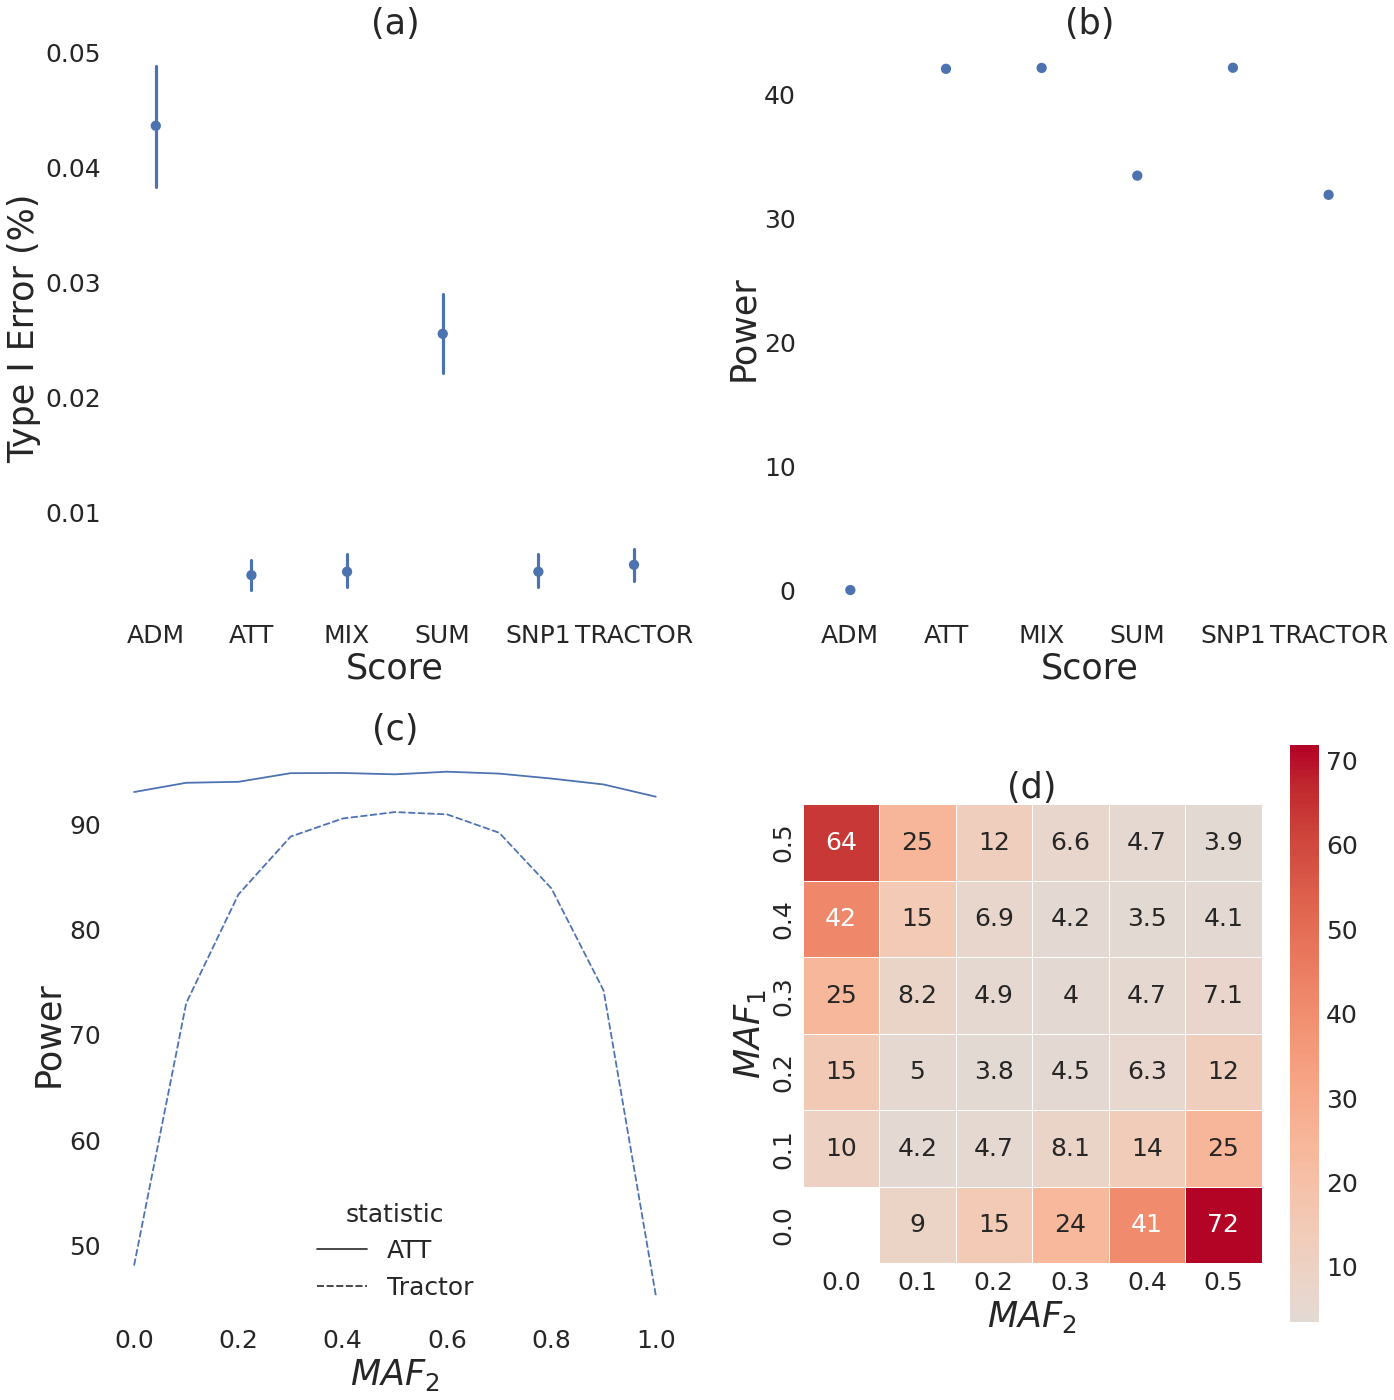

In [4]:
#Full Figure 2
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

#2a
OR = 1.0
rls = pd.read_csv(f"{sim_dir}/all_data/{OR}_summary_bonf.csv.gz")
scores = ["ADM", "ATT", "MIX", "SUM", "SNP1", "TRACTOR"]
temp = pd.DataFrame()
for score in scores:
    score_data = pd.DataFrame()
    score_data["Power"] = rls[score] * 100
    score_data["Score"] = np.repeat(score, len(rls))
    temp = pd.concat((temp, score_data))
sns.pointplot(data=temp, x="Score", y="Power", ax = axes[0,0], join=False, ca=95)
axes[0,0].set_title("(a)")
axes[0,0].set_ylabel("Type I Error (%)")

#2b
OR = 1.2
rls = pd.read_csv(f"{sim_dir}/all_data/{OR}_summary_bonf.csv.gz")
scores = ["ADM", "ATT", "MIX", "SUM", "SNP1", "TRACTOR"]
temp = pd.DataFrame()
for score in scores:
    score_data = pd.DataFrame()
    score_data["Power"] = rls[score] * 100
    score_data["Score"] = np.repeat(score, len(rls))
    temp = pd.concat((temp, score_data))
sns.pointplot(data=temp, x="Score", y="Power", ax=axes[0,1], join=False, ci=95)
axes[0,1].set_title("(b)" )

#2c
p_1 = 0.5 #expected value for global ancestry (probability of ancestry 1)
n_indiv = 10000
beta_ratio = 1.0
abs_beta = 1.0
beta = np.round([beta_ratio * abs_beta, abs_beta], 2)

summ = pd.DataFrame()
f2s = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

freq = 0.5
for f2 in f2s:
    f = np.round([freq, f2], 2)
    dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
    summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])

data = pd.DataFrame()
summ["Tractor"] = summ["TRACTOR"]
scores = ["ATT", "Tractor"]

data["Frequency 2"] = np.tile(f2s, len(scores))
data["statistic"] = np.repeat(scores, len(f2s))

power = []
for score in scores:
    power = np.concatenate([power, summ[score] * 100])
data["Power"] = power

sns.lineplot(data = data, ax = axes[1,0], x = "Frequency 2", y = "Power", style = "statistic", legend = "full", palette = "Set2")
z = stats.norm.ppf(1-.01/2)
ci_ATT = z * np.sqrt((summ["ATT"] * (1-summ["ATT"])) / 1000)
ci_TRACTOR = z * np.sqrt((summ["TRACTOR"] * (1-summ["TRACTOR"])) / 1000)
axes[1,0].fill_between(summ["f1"], (summ["ATT"]*100-ci_ATT), (summ["ATT"]*100+ci_ATT), color='blue', alpha=0.1)
axes[1,0].fill_between(summ["f1"], (summ["TRACTOR"]*100-ci_TRACTOR), (summ["TRACTOR"]*100+ci_TRACTOR), color='blue', alpha=0.1)
axes[1,0].set_title("(c)")
axes[1,0].set_xlabel(r"$MAF_2$")

#2d
freqs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
data = np.zeros((len(freqs), len(freqs)))
i = 0
for freq1 in freqs:
    summ = pd.DataFrame()
    for freq2 in freqs:
        f = np.round([freq1, freq2], 2) #allele frequencies for allele 1 at each ancestry
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[len(freqs) - (i+1),:] = diff
    i = i+1

heat_map = sns.heatmap(data, ax = axes[1,1], square = True, linewidth = 1 , annot = True, xticklabels = freqs, yticklabels = freqs[::-1], cmap = "coolwarm", center = 0.0)
axes[1,1].set_title("(d)")
axes[1,1].set_xlabel(r"$MAF_2$")
axes[1,1].set_ylabel(r"$MAF_1$")
plt.tight_layout()
plt.savefig("Figure2.png")

## Numerical Information Related to Figure 2

In [5]:
OR = 1.0
rls = pd.read_csv(f"{sim_dir}/all_data/{OR}_summary_bonf.csv.gz")
scores = ["ADM", "ATT", "MIX", "SUM", "SNP1", "TRACTOR"]
means = np.zeros(len(scores))
maxes = np.zeros(len(scores))
p_snp1 = np.zeros(len(scores))
p_att = np.zeros(len(scores))
for i in range(0, len(scores)):
    means[i] = np.mean(rls[scores[i]])
    maxes[i] = np.max(rls[scores[i]])
    p_snp1[i] = stats.ttest_ind(rls[scores[i]], rls["SNP1"], equal_var = False)[1]
    p_att[i] = stats.ttest_ind(rls[scores[i]], rls["ATT"], equal_var = False)[1]
summ = pd.DataFrame({"Odds Ratio": np.repeat(OR, len(scores)), "score": scores, "mean": means * 100, "max": maxes * 100, "P vs SNP1": p_snp1, "P vs ATT": p_att})
OR = 1.2
rls = pd.read_csv(f"{sim_dir}/all_data/{OR}_summary_bonf.csv.gz")
scores = ["ADM", "ATT", "MIX", "SUM", "SNP1", "TRACTOR"]
means = np.zeros(len(scores))
maxes = np.zeros(len(scores))
p_snp1 = np.zeros(len(scores))
p_att = np.zeros(len(scores))
for i in range(0, len(scores)):
    means[i] = np.mean(rls[scores[i]])
    maxes[i] = np.max(rls[scores[i]])
    p_snp1[i] = stats.ttest_ind(rls[scores[i]], rls["SNP1"], equal_var = False)[1]
    p_att[i] = stats.ttest_ind(rls[scores[i]], rls["ATT"], equal_var = False)[1]
summ = pd.concat((summ, pd.DataFrame({"Odds Ratio": np.repeat(OR, len(scores)), "score": scores, "mean": means * 100, "max": maxes * 100, "P vs SNP1": p_snp1, "P vs ATT": p_att})))
display(summ)

,Odds Ratio,score,mean,max,P vs SNP1,P vs ATT
0,1.0,ADM,0.0436,0.6,1.036709e-43,2.423709e-44
1,1.0,ATT,0.0045,0.2,7.528720e-01,1.000000e+00
2,1.0,MIX,0.0048,0.1,1.000000e+00,7.528720e-01
3,1.0,SUM,0.0255,0.4,1.546376e-27,2.625268e-28
4,1.0,SNP1,0.0048,0.1,1.000000e+00,7.528720e-01
5,1.0,TRACTOR,0.0054,0.2,5.463169e-01,3.637724e-01
0,1.2,ADM,0.0390,0.5,0.000000e+00,0.000000e+00
1,1.2,ATT,42.0493,48.5,3.251289e-01,1.000000e+00
2,1.2,MIX,42.1208,50.1,8.778817e-01,4.152463e-01
3,1.2,SUM,33.4389,42.5,0.000000e+00,0.000000e+00


## Supplemental Figures Related to Figure 2

### Figure S1

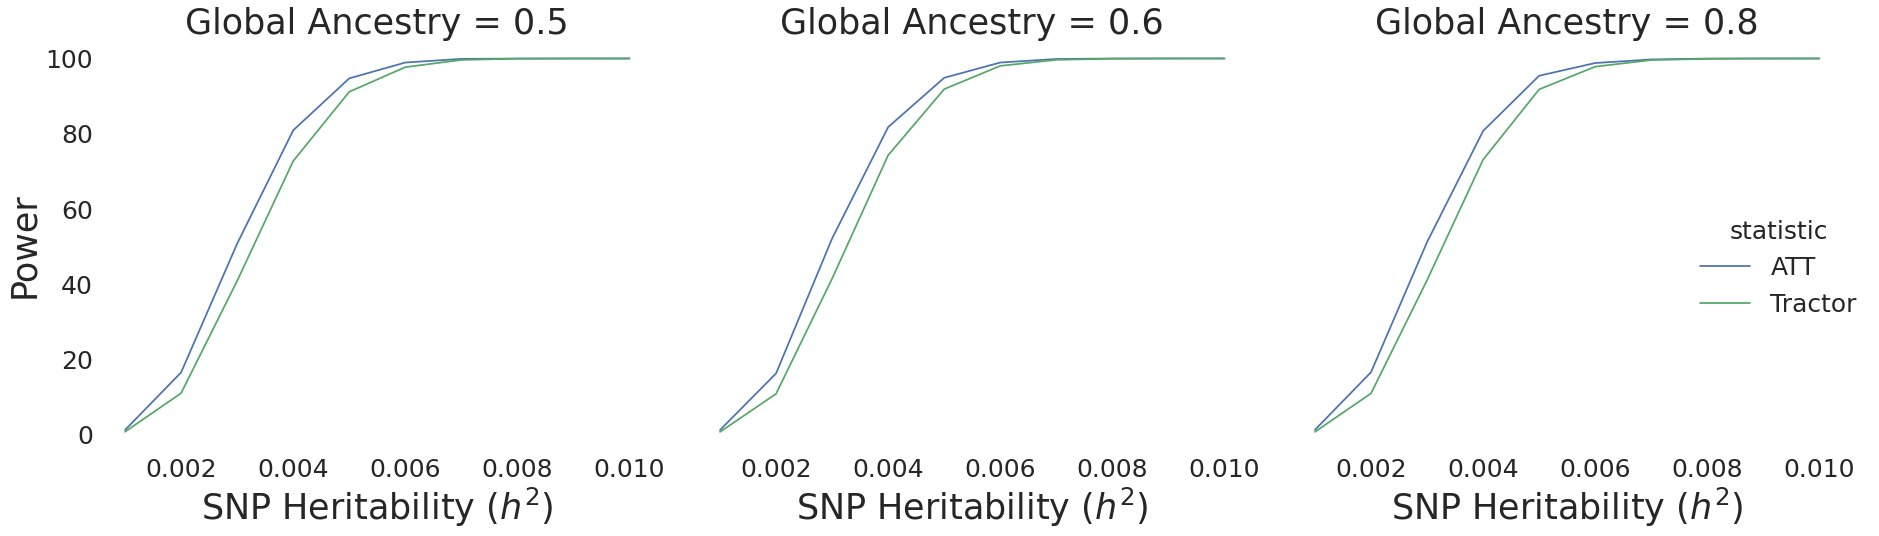

In [16]:
freq = 0.5
n_indiv = 10000
f_diff = 0.0
f = np.round([freq, freq - f_diff], 2)
beta_ratio = 1.0
abs_beta = 1.0
beta = np.round([beta_ratio * abs_beta, abs_beta], 2)

h2s = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010]
data = pd.DataFrame()

p1s = [0.5, 0.6, 0.8]
for p_1 in p1s:  
    summ = pd.DataFrame()
    for h in h2s:
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}"
        if h != 0.005:
            dir_name = dir_name + f"_h2_{h}"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}_rls.csv.gz")])
    some_data = pd.DataFrame()
    summ["Tractor"] = summ["TRACTOR"]
    scores = ["ATT", "Tractor"]

    some_data["SNP Heritability ($h^2$)"] = np.tile(h2s, len(scores))
    some_data["statistic"] = np.repeat(scores, len(h2s))

    power = []
    for score in scores:
        power = np.concatenate([power, summ[score] * 100])
    some_data["Power"] = power
    some_data["Global Ancestry"] = np.repeat([p_1], len(power))
    data = pd.concat([data, some_data])
    
fig = sns.FacetGrid(data, col = "Global Ancestry", hue = "statistic", height=8)
fig.map(sns.lineplot, "SNP Heritability ($h^2$)", "Power", ci="sd", err_style='band')
fig.add_legend()
plt.tight_layout()
plt.savefig("FigureS1.png")

### Figure S2

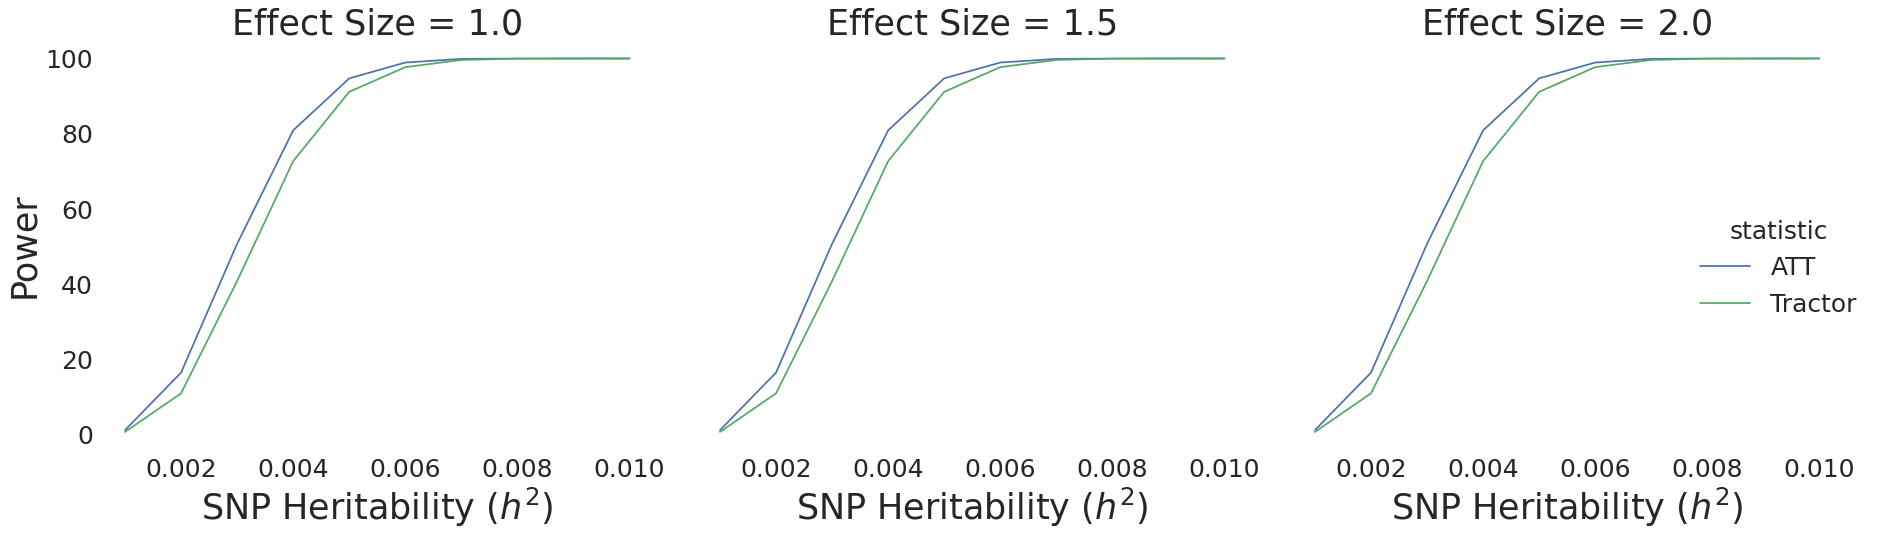

In [17]:
freq = 0.5
n_indiv = 10000
f_diff = 0.0
f = np.round([freq, freq - f_diff], 2)
p_1 = 0.5
beta_ratio = 1.0

h2s = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010]
data = pd.DataFrame()

abs_betas = [1.0, 1.5, 2.0]
for abs_beta in abs_betas: 
    beta = np.round([beta_ratio * abs_beta, abs_beta], 2)
    summ = pd.DataFrame()
    for h in h2s:
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}"
        if abs_beta != 1.0:
            dir_name = dir_name + f"_ab_{abs_beta}"
        if h != 0.005:
            dir_name = dir_name + f"_h2_{h}"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}_rls.csv.gz")])
    some_data = pd.DataFrame()
    scores = ["ATT", "Tractor"]
    summ["Tractor"] = summ["TRACTOR"]
    some_data["SNP Heritability ($h^2$)"] = np.tile(h2s, len(scores))
    some_data["statistic"] = np.repeat(scores, len(h2s))
    power = []
    for score in scores:
        power = np.concatenate([power, summ[score] * 100])
    some_data["Power"] = power
    some_data["Effect Size"] = np.repeat([abs_beta], len(power))
    data = pd.concat([data, some_data])
    
fig = sns.FacetGrid(data, col = "Effect Size", hue = "statistic", height=8)
fig.map(sns.lineplot, "SNP Heritability ($h^2$)", "Power", ci="sd", err_style='band')
fig.add_legend()
plt.tight_layout()
plt.savefig("FigureS2.png")

### Figure S3

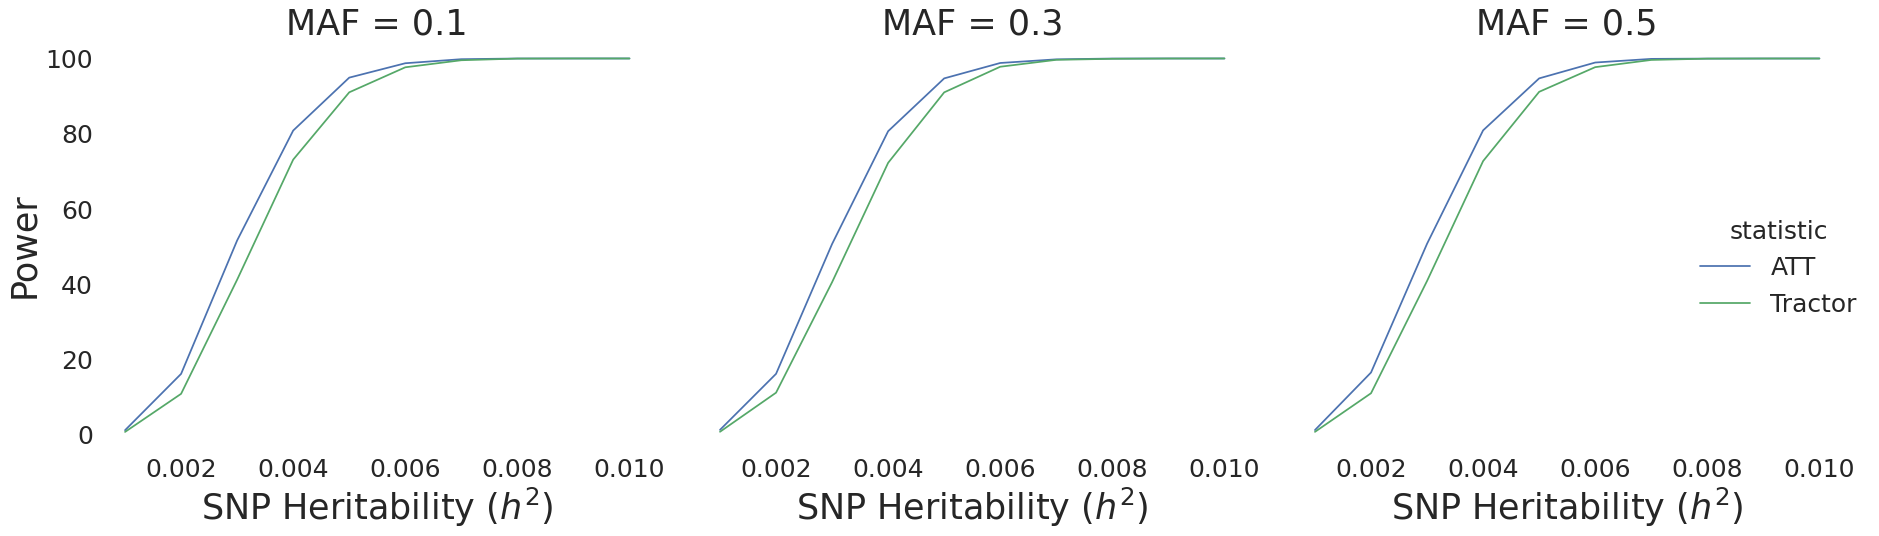

In [25]:
p_1 = 0.5 #expected value for global ancestry (probability of ancestry 1)
n_indiv = 10000
f_diff = 0.0
beta_ratio = 1.0
abs_beta = 1.0
beta = np.round([beta_ratio * abs_beta, abs_beta], 2)

h2s = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010]
data = pd.DataFrame()

freqs = [0.1, 0.3, 0.5]
for freq in freqs:
    f = np.round([freq, freq - f_diff], 2)
    summ = pd.DataFrame()
    for h in h2s:
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_h2_{h}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    some_data = pd.DataFrame()
    scores = ["ATT", "Tractor"]
    summ["Tractor"] = summ["TRACTOR"]
    some_data["SNP Heritability ($h^2$)"] = np.tile(h2s, len(scores))
    some_data["statistic"] = np.repeat(scores, len(h2s))

    power = []
    for score in scores:
        power = np.concatenate([power, summ[score] * 100])
    some_data["Power"] = power
    some_data["MAF"] = np.repeat([freq], len(power))
    data = pd.concat([data, some_data])
    
fig = sns.FacetGrid(data, col = "MAF", hue = "statistic", height=8)
fig.map(sns.lineplot, "SNP Heritability ($h^2$)", "Power", ci="sd", err_style='band')
fig.add_legend()
plt.tight_layout()
plt.savefig("FigureS3.png")

### Figure S4

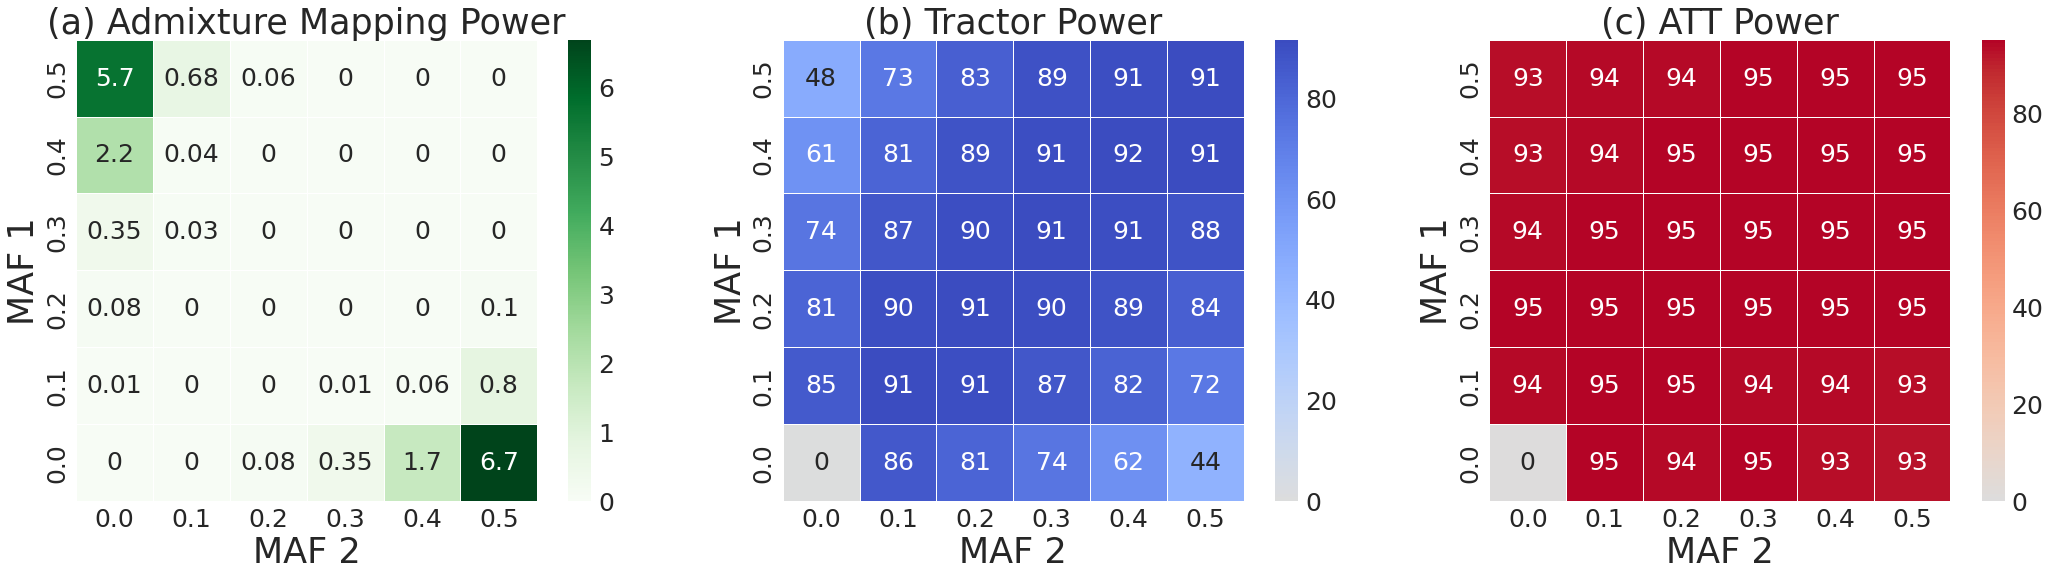

In [19]:
fig, axes = plt.subplots(1,3, figsize=(30,8), sharex=True)
p_1 = 0.5 #expected value for global ancestry (probability of ancestry 1)
freqs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
beta_ratio = 1.0
beta = [beta_ratio, 1.0]
n_indiv = 10000
data = np.zeros((len(freqs), len(freqs)))
i = 0
for freq1 in freqs:
    summ = pd.DataFrame()
    for freq2 in freqs:
        f = np.round([freq1, freq2], 2) #allele frequencies for allele 1 at each ancestry
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_ADM_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diff = np.array(summ["ADM"] * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[len(freqs) - (i+1),:] = diff
    i = i+1
    
heat_map = sns.heatmap(data, ax=axes[0], square = True, linewidth = 1 , annot = True, xticklabels = freqs, yticklabels = freqs[::-1], cmap = "Greens")
axes[0].set_title("(a) Admixture Mapping Power")
axes[0].set_xlabel("MAF 2")
axes[0].set_ylabel("MAF 1")

data = np.zeros((len(freqs), len(freqs)))
i = 0
for freq1 in freqs:
    summ = pd.DataFrame()
    for freq2 in freqs:
        f = np.round([freq1, freq2], 2) #allele frequencies for allele 1 at each ancestry
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diff = np.array(summ["TRACTOR"] * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[len(freqs) - (i+1),:] = diff
    i = i+1
    
heat_map = sns.heatmap(data, ax=axes[1], square = True, linewidth = 1 , annot = True, xticklabels = freqs, yticklabels = freqs[::-1], cmap = "coolwarm_r", center = 0.0)
axes[1].set_title("(b) Tractor Power")
axes[1].set_xlabel("MAF 2")
axes[1].set_ylabel("MAF 1")

data = np.zeros((len(freqs), len(freqs)))
i = 0
for freq1 in freqs:
    summ = pd.DataFrame()
    for freq2 in freqs:
        f = np.round([freq1, freq2], 2) #allele frequencies for allele 1 at each ancestry
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diff = np.array(summ["ATT"] * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[len(freqs) - (i+1),:] = diff
    i = i+1
    
heat_map = sns.heatmap(data, ax=axes[2], square = True, linewidth = 1 , annot = True, xticklabels = freqs, yticklabels = freqs[::-1], cmap = "coolwarm", center = 0.0)
axes[2].set_title("(c) ATT Power")
axes[2].set_xlabel("MAF 2")
axes[2].set_ylabel("MAF 1")
plt.tight_layout()
plt.savefig("FigureS4.png")

# Figure 3

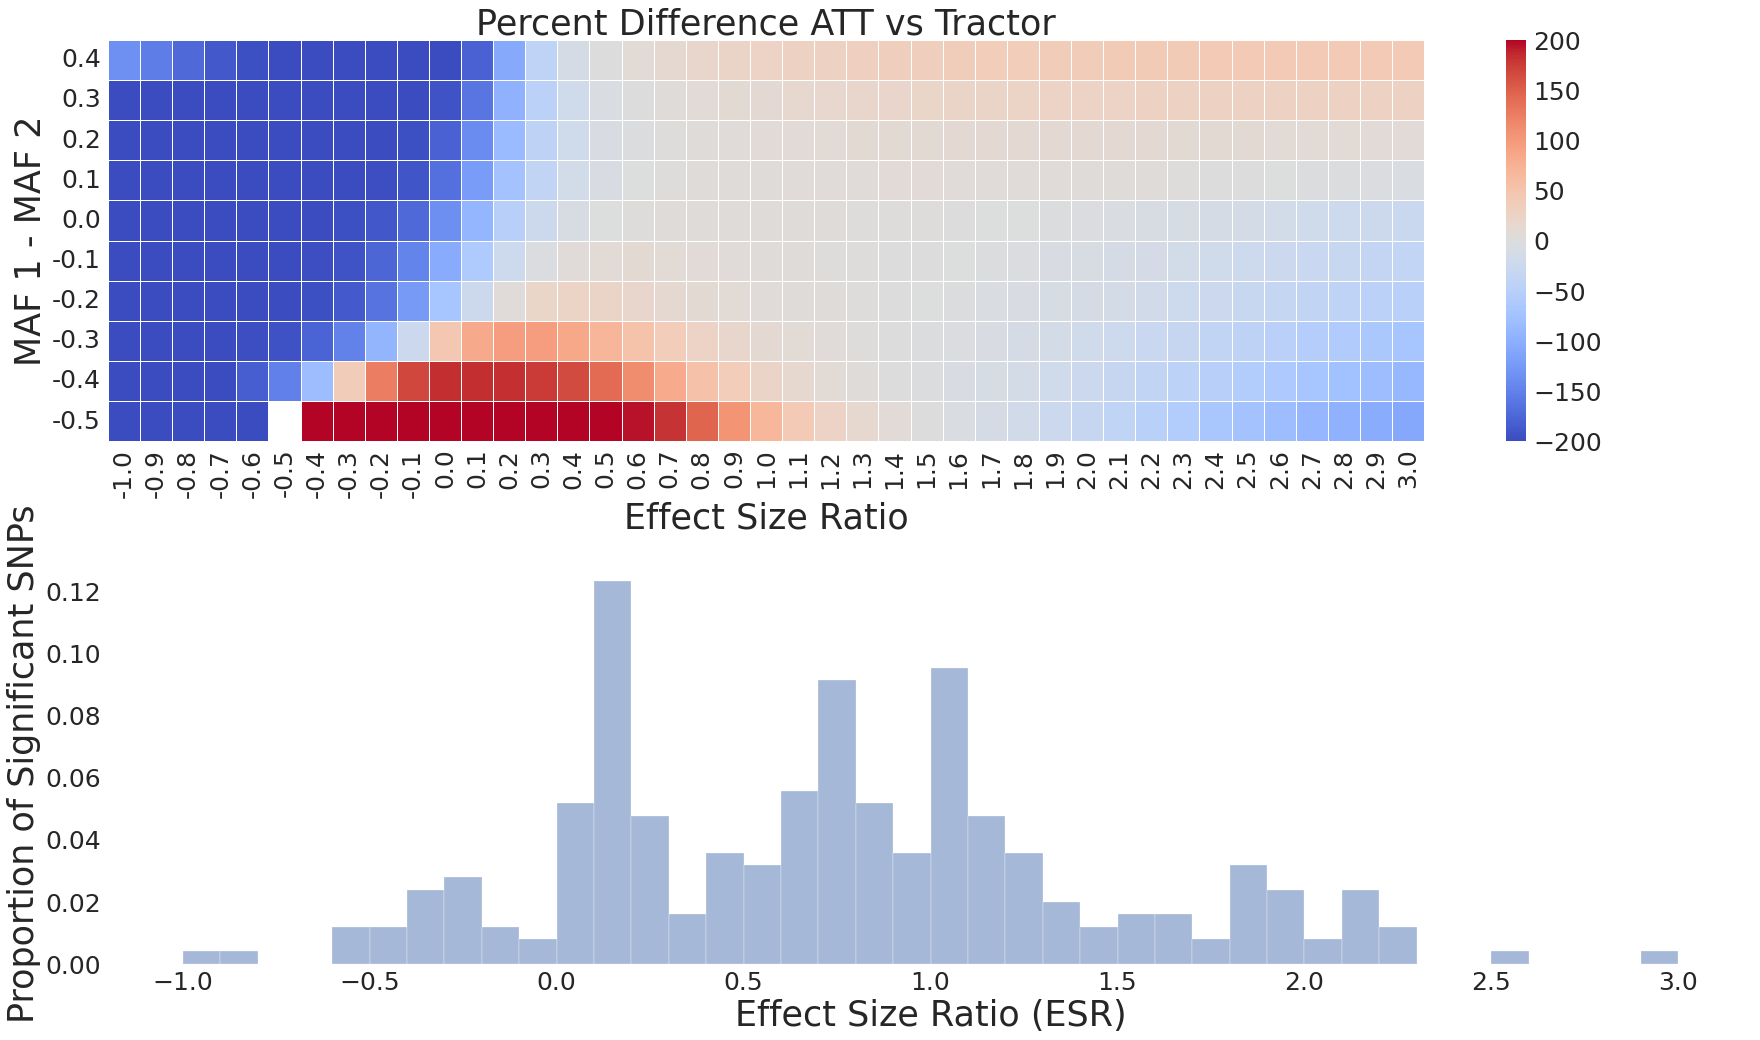

In [5]:
#Figure 3a
p_1 = 0.5 #expected value for global ancestry (probability of ancestry 1)
freq = 0.5
beta_ratios = np.array(range(-10, 31)) / 10
f_diffs = [0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5]
diffs = np.zeros(len(f_diffs))
n_indiv = 10000
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff

#Figure 3b
rls = pd.read_csv(f"{info_dir}/ratiolist.csv.gz")

#Full Figure 3
fig, axes = plt.subplots(2,1, figsize=(25,15))
sns.heatmap(data, ax=axes[0], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)

axes[0].set_title( "Percent Difference ATT vs Tractor" )
axes[0].set_xlabel("Effect Size Ratio")
axes[0].set_ylabel("MAF 1 - MAF 2")
sns.histplot(rls, ax=axes[1], stat="proportion", legend=False, bins=[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0])
axes[1].set_xlabel("Effect Size Ratio (ESR)")
axes[1].set_ylabel("Proportion of Significant SNPs")
plt.tight_layout()
plt.savefig("Figure3.png")

## Numerical Information Related to Figure 3

In [15]:
rls = pd.read_csv(f"{info_dir}/scorelist.csv.gz")
att = rls["att"][np.isfinite(rls["att"])]
tractor = rls["tractor"][np.isfinite(rls["tractor"])]
print(f"Mean of ATT Chi Square Statistic (1 dof): {np.mean(att)}")
print(f"Mean of Tractor Chi Square Statistic (adjusted from 2 dof to 1 dof): {np.mean(tractor)}")
print(f"P-Value for Difference of Means between ATT and TRACTOR statistics: {stats.ttest_ind(att,tractor)[1]}")
rls2 = pd.read_csv(f"{info_dir}/ratiolist.csv.gz")
percent_window = ((len(rls2) - len(rls2[rls2["ratio"]>1.5]) - len(rls2[rls2["ratio"]<-0.5]))/len(rls2)) * 100
print(f"Percent of Significant SNPs within the [-0.5, 1.5] window: {percent_window}")

Mean of ATT Chi Square Statistic (1 dof): 42.92268189249275
Mean of Tractor Chi Square Statistic (adjusted from 2 dof to 1 dof): 37.49844319712045
P-Value for Difference of Means between ATT and TRACTOR statistics: 0.00021094956520085258
Percent of Significant SNPs within the [-0.5, 1.5] window: 69.26713947990544


## Supplemental Figures Related to Figure 3

### Figure S5

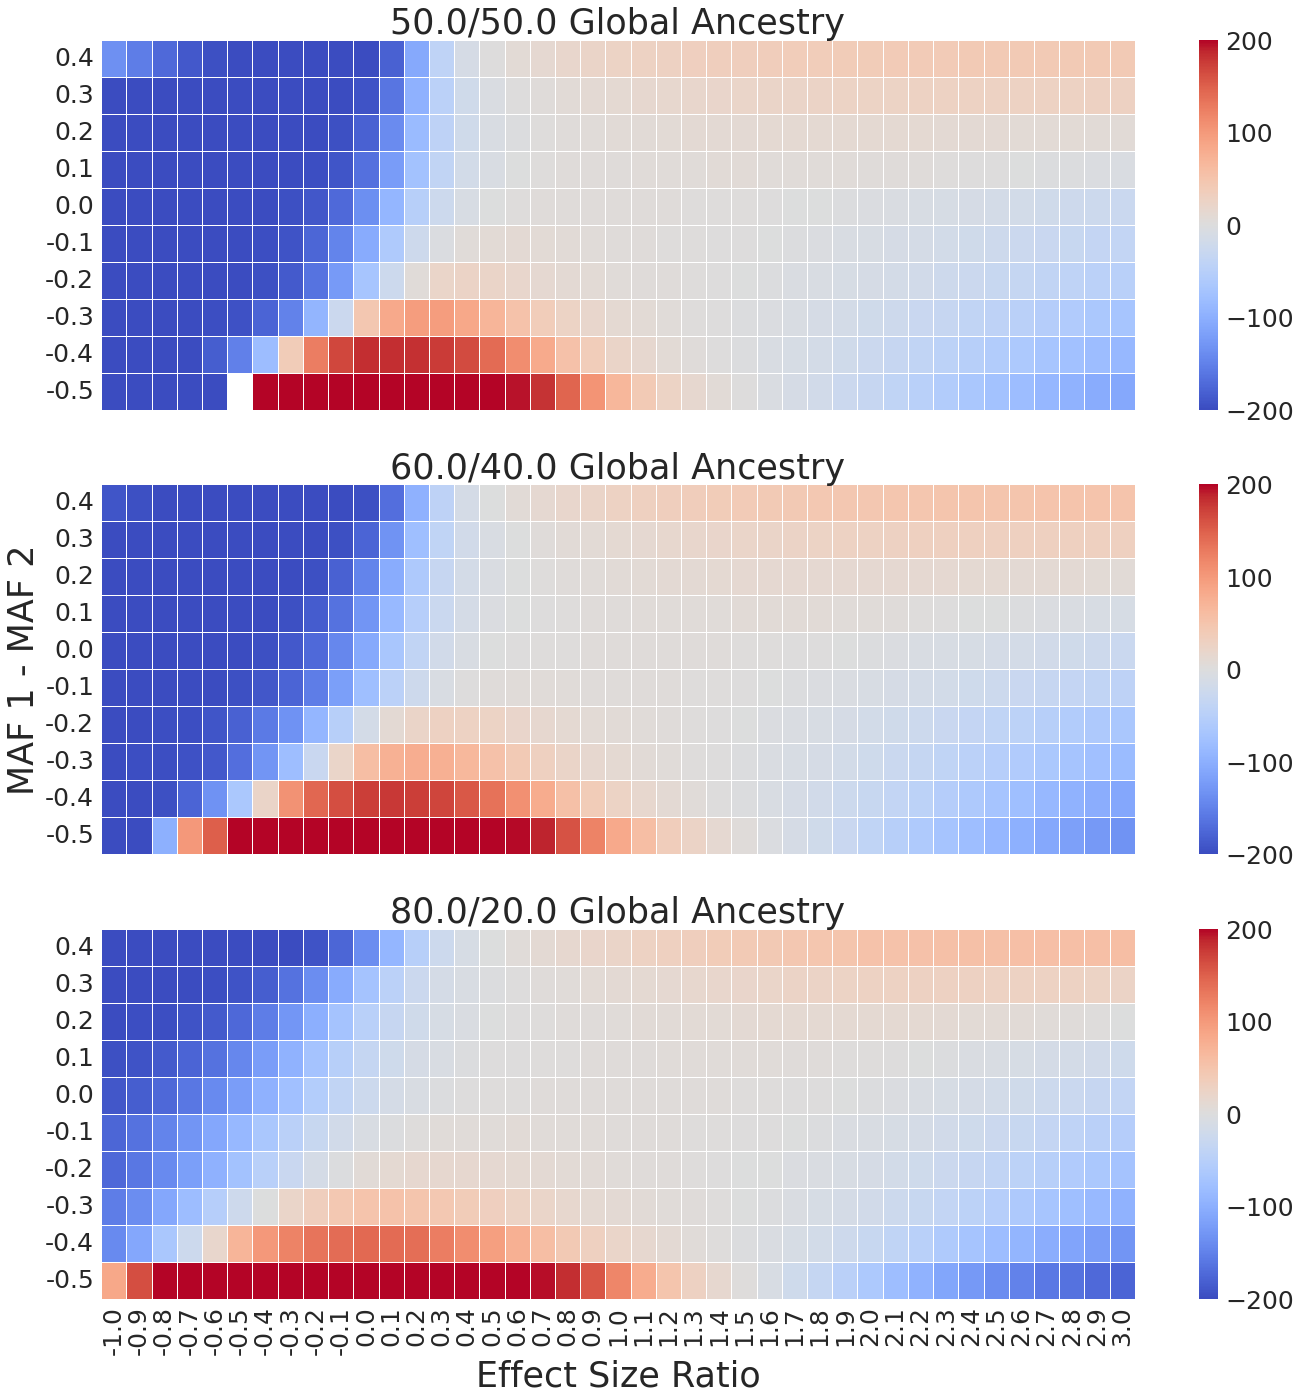

In [20]:
fig, axes = plt.subplots(3,1, figsize=(20,20), sharex=True)
p_1 = 0.5 #expected value for global ancestry (probability of ancestry 1)
freq = 0.5
f_diffs = [0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5]
beta_ratios = np.array(range(-10, 31)) / 10
diffs = np.zeros(len(f_diffs))
n_indiv = 10000
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[0], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[0].set_title(f"{p_1 * 100}/{(1-p_1) * 100} Global Ancestry")

p_1 = 0.6 #expected value for global ancestry (probability of ancestry 1)
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[1], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[1].set_title(f"{p_1 * 100}/{(1-p_1) * 100} Global Ancestry")
axes[1].set_ylabel("MAF 1 - MAF 2")

p_1 = 0.8 #expected value for global ancestry (probability of ancestry 1)
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[2], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[2].set_title(f"{p_1 * 100}/{np.round((1-p_1) * 100, 2)} Global Ancestry")

axes[2].set_xlabel("Effect Size Ratio")

plt.tight_layout()
plt.savefig("FigureS5.png")

### Figure S6

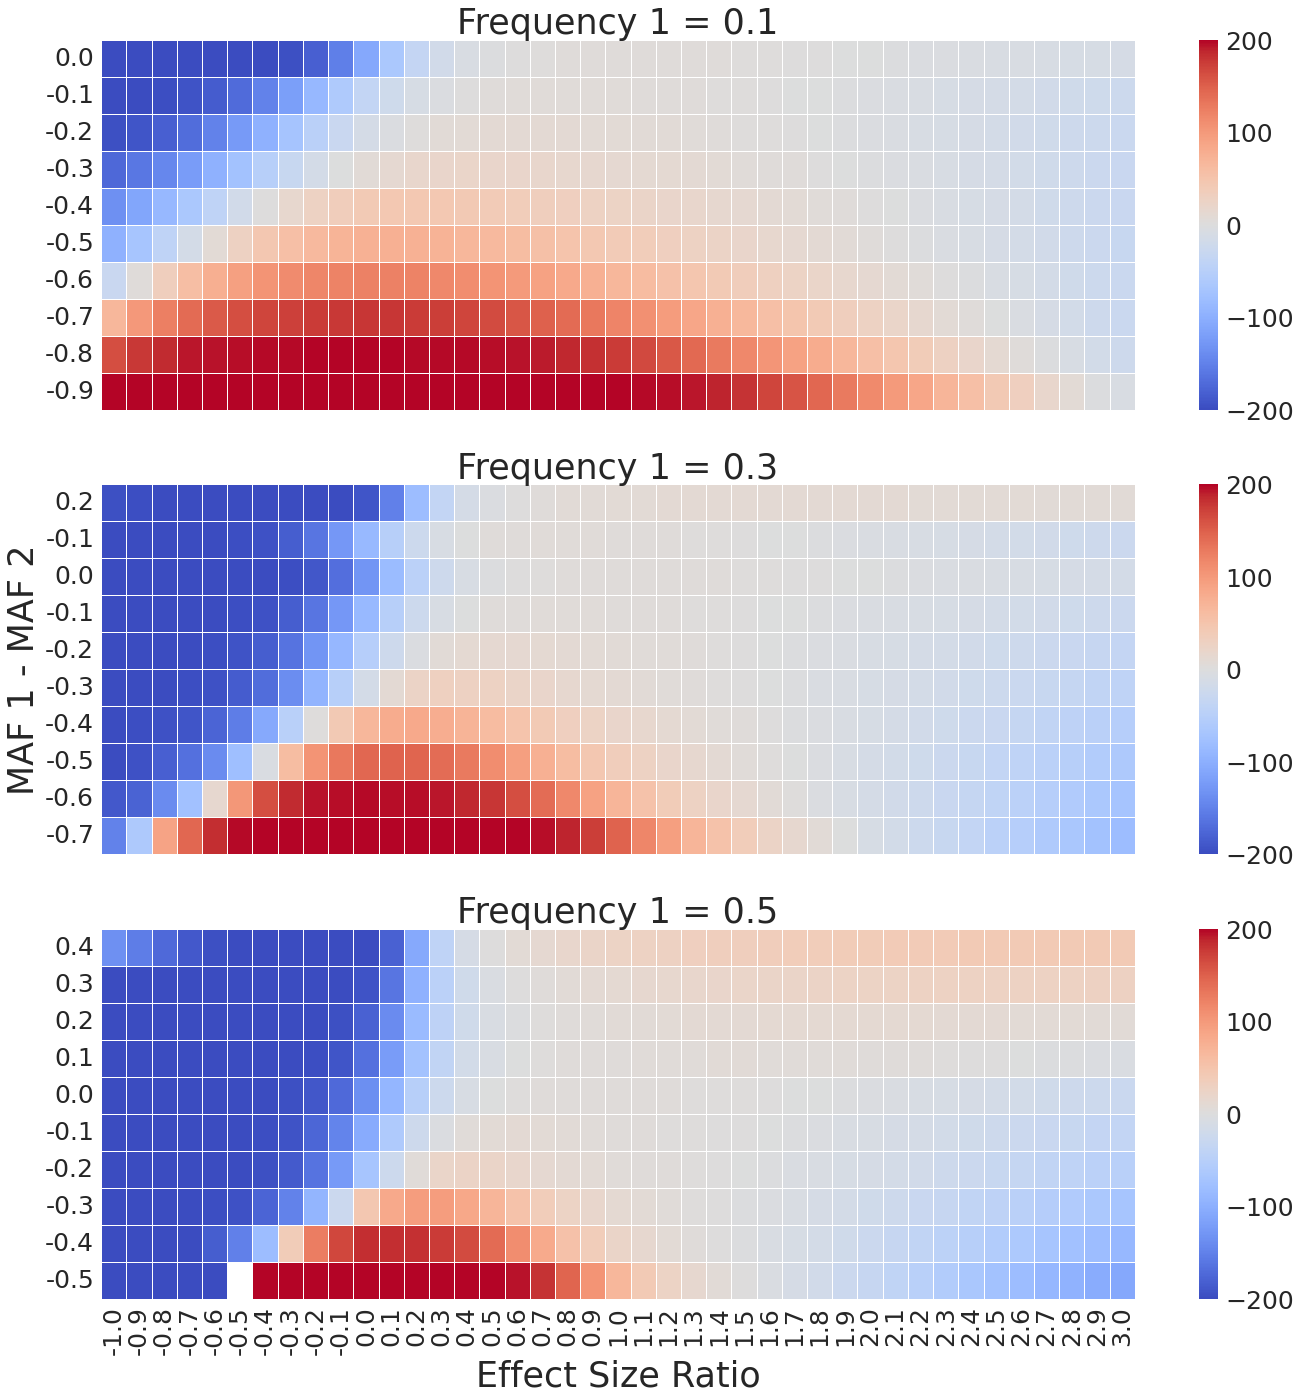

In [21]:
fig, axes = plt.subplots(3,1, figsize=(20,20), sharex=True)

p_1 = 0.5 #expected value for global ancestry (probability of ancestry 1)
freq = 0.1
beta_ratios = np.array(range(-10, 31)) / 10
f_diffs = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
diffs = np.zeros(len(f_diffs))
n_indiv = 10000
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[0], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[0].set_title(f"Frequency 1 = {freq}")

freq = 0.3
f_diffs = [0.2, -0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7]
diffs = np.zeros(len(f_diffs))
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[1], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[1].set_title(f"Frequency 1 = {freq}")
axes[1].set_ylabel("MAF 1 - MAF 2")

freq = 0.5
f_diffs = [0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5]
diffs = np.zeros(len(f_diffs))
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[2], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[2].set_title(f"Frequency 1 = {freq}")

axes[2].set_xlabel("Effect Size Ratio")

plt.tight_layout()
plt.savefig("FigureS6.png")

### Figure S7

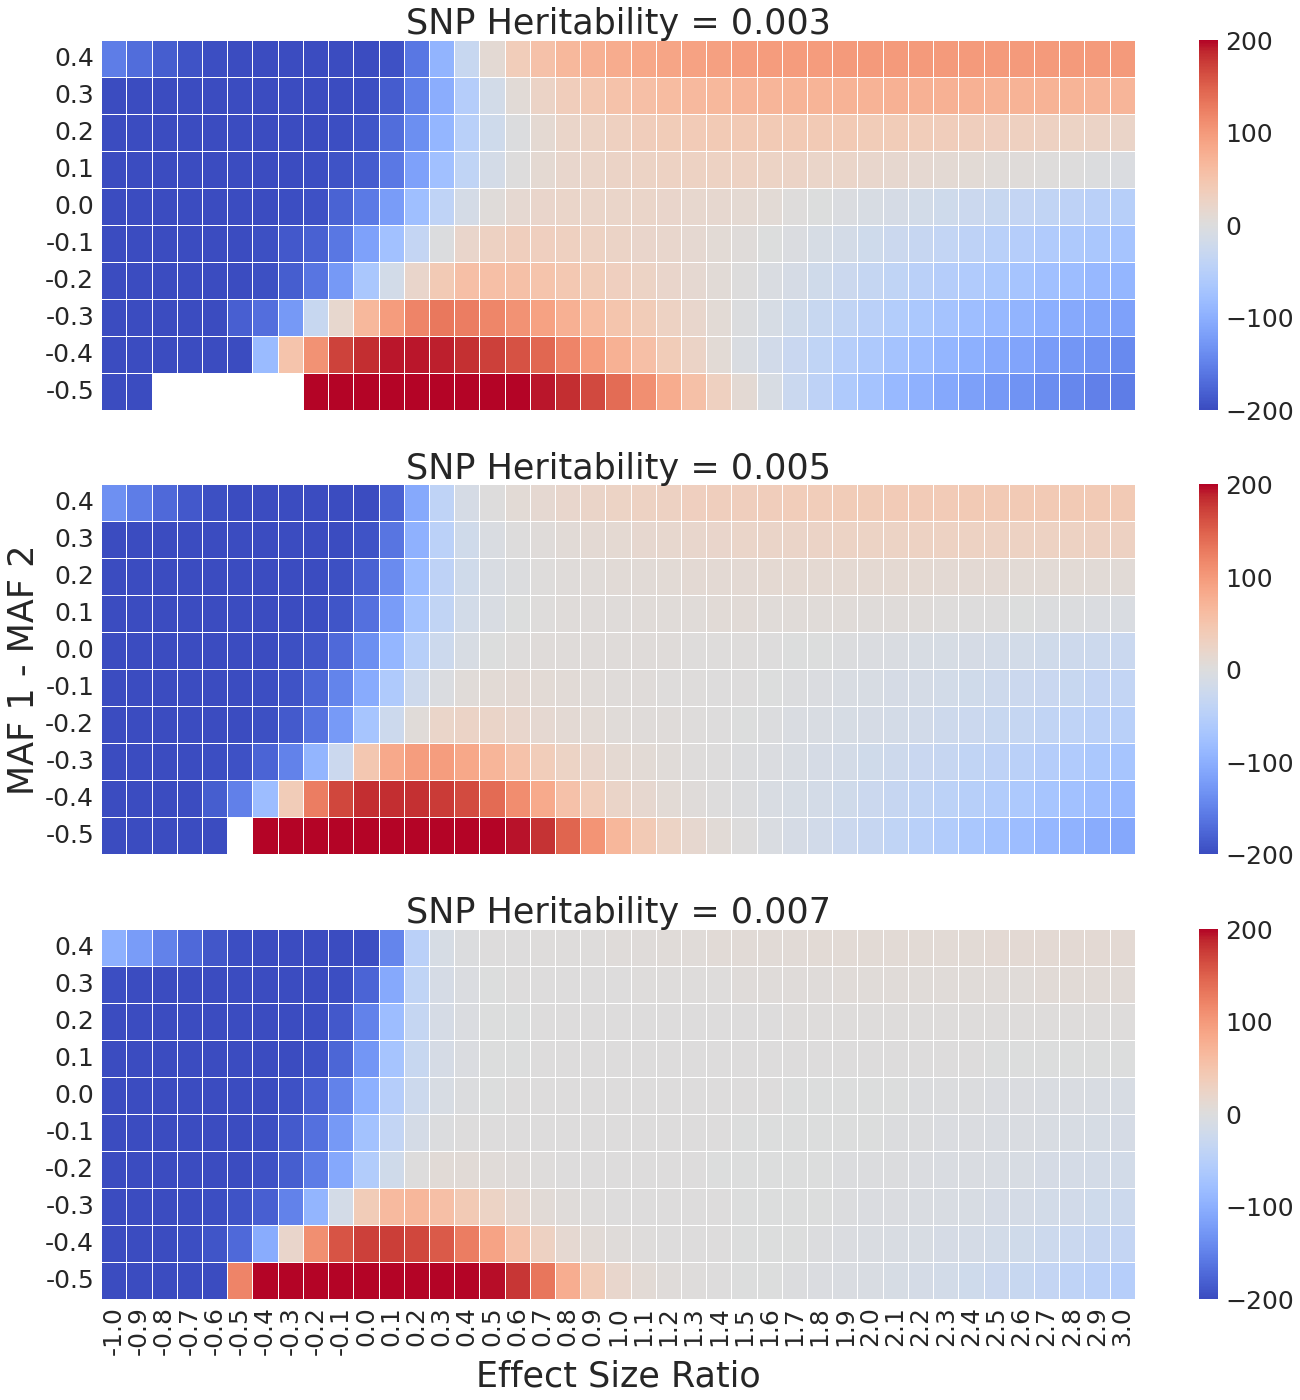

In [22]:
fig, axes = plt.subplots(3,1, figsize=(20,20), sharex=True)

h2 = 0.003
p_1 = 0.5 #expected value for global ancestry (probability of ancestry 1)
freq = 0.5
beta_ratios = np.array(range(-10, 31)) / 10
f_diffs = [0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5]
diffs = np.zeros(len(f_diffs))
n_indiv = 10000
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_h2_{h2}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[0], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[0].set_title(f"SNP Heritability = {h2}")

h2 = 0.005
diffs = np.zeros(len(f_diffs))
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[1], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[1].set_title(f"SNP Heritability = {h2}")
axes[1].set_ylabel("MAF 1 - MAF 2")

h2 = 0.007
diffs = np.zeros(len(f_diffs))
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_h2_{h2}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array((summ["ATT"] - summ["TRACTOR"]) / (.5*(summ["ATT"] + summ["TRACTOR"])) * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[2], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[2].set_title(f"SNP Heritability = {h2}")

axes[2].set_xlabel("Effect Size Ratio")

plt.tight_layout()
plt.savefig("FigureS7.png")

## Figure S8

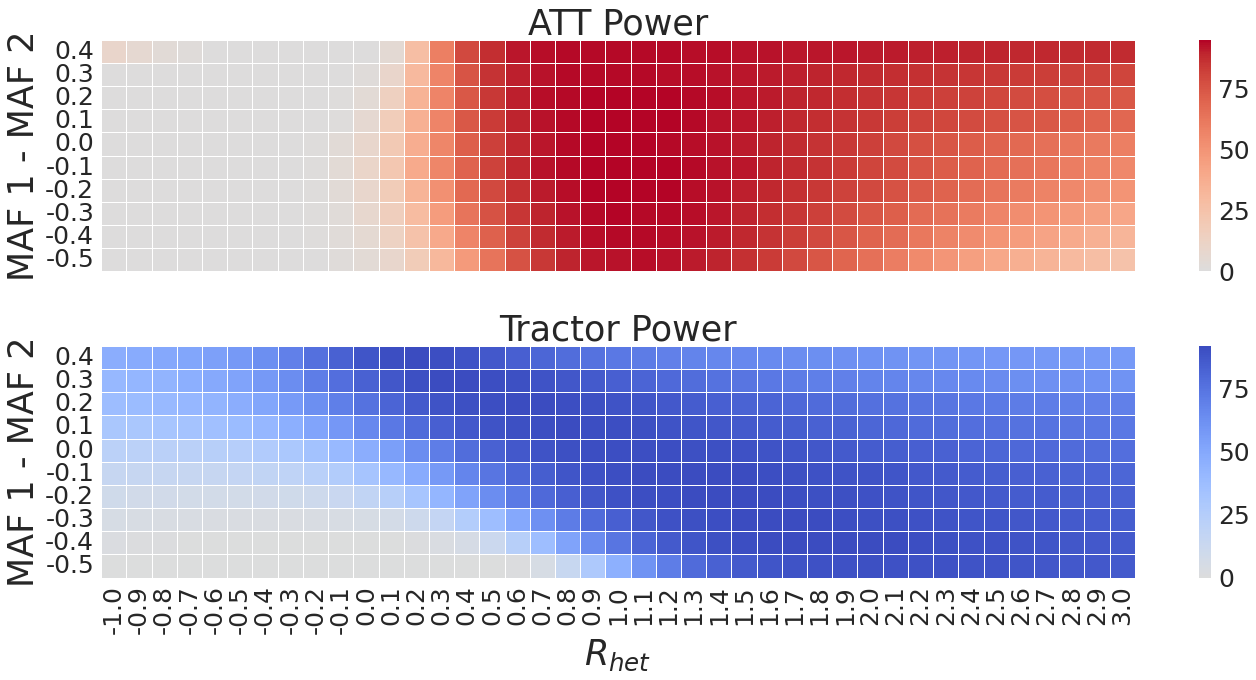

In [7]:
fig, axes = plt.subplots(2,1, figsize=(20,10), sharex=True)
beta_ratios = np.array(range(-10, 31)) / 10

p_1 = 0.5 #expected value for global ancestry (probability of ancestry 1)
freq = 0.5
f_diffs = [0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5]
diffs = np.zeros(len(f_diffs))
n_indiv = 10000
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array(summ["ATT"]* 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[0], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm", center=0.0)
axes[0].set_title(f"ATT Power")
axes[0].set_ylabel("MAF 1 - MAF 2")

diffs = np.zeros(len(f_diffs))
data = np.zeros((len(f_diffs), len(beta_ratios)))
for i in range(0, len(f_diffs)):
    f_diff = f_diffs[i]
    f = np.round([freq, freq - f_diff], 2) #allele frequencies for allele 1 at each ancestry
    summ = pd.DataFrame()
    for beta_ratio in beta_ratios:
        beta = [beta_ratio, 1.0]
        dir_name = f"{sim_dir}/{f[0]}_{f[1]}_{p_1}_{n_indiv}/{beta[0]}_{beta[1]}_rls"
        summ = pd.concat([summ, pd.read_csv(f"{dir_name}.csv.gz")])
    diffs[i] = (f[0] - f[1]) / (.5 * (f[0] + f[1])) * 100
    diff = np.array(summ["TRACTOR"] * 100) #positive means ATT has higher power, negative means TRACTOR has higher power
    data[i,:] = diff
sns.heatmap(data, ax=axes[1], linewidth = 1 , annot = False, xticklabels=beta_ratios, yticklabels=f_diffs, cmap = "coolwarm_r", center=0.0)
axes[1].set_title(f"Tractor Power")
axes[1].set_ylabel("MAF 1 - MAF 2")

axes[1].set_xlabel("$R_{het}$")

plt.tight_layout()
plt.savefig("FigureS8.png")

### Figure S9

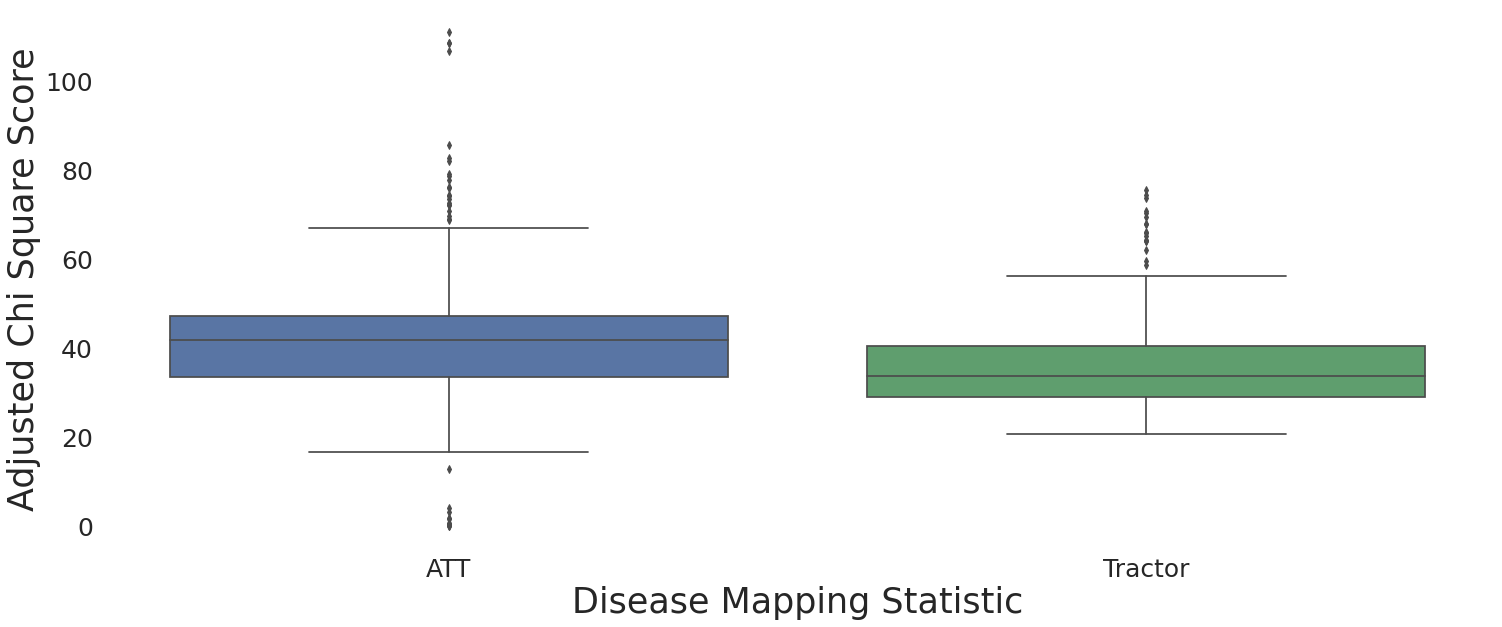

In [7]:
rls = pd.read_csv(f"{info_dir}/scorelist.csv.gz")
att = rls["att"][np.isfinite(rls["att"])]
tractor = rls["tractor"][np.isfinite(rls["tractor"])]
summ = pd.DataFrame()
summ["score"] = np.append(np.repeat("ATT", len(att)), np.repeat("Tractor", len(tractor)))
summ["stat"] = np.append(att, tractor)
fig = plt.figure(figsize=(25, 10))
sns.set_style("white")
plot = sns.boxplot(data = summ, x = "score", y = "stat")
plt.xlabel("Disease Mapping Statistic")
plt.ylabel("Adjusted Chi Square Score")
plt.savefig("FigureS9.png")

# Figure 4

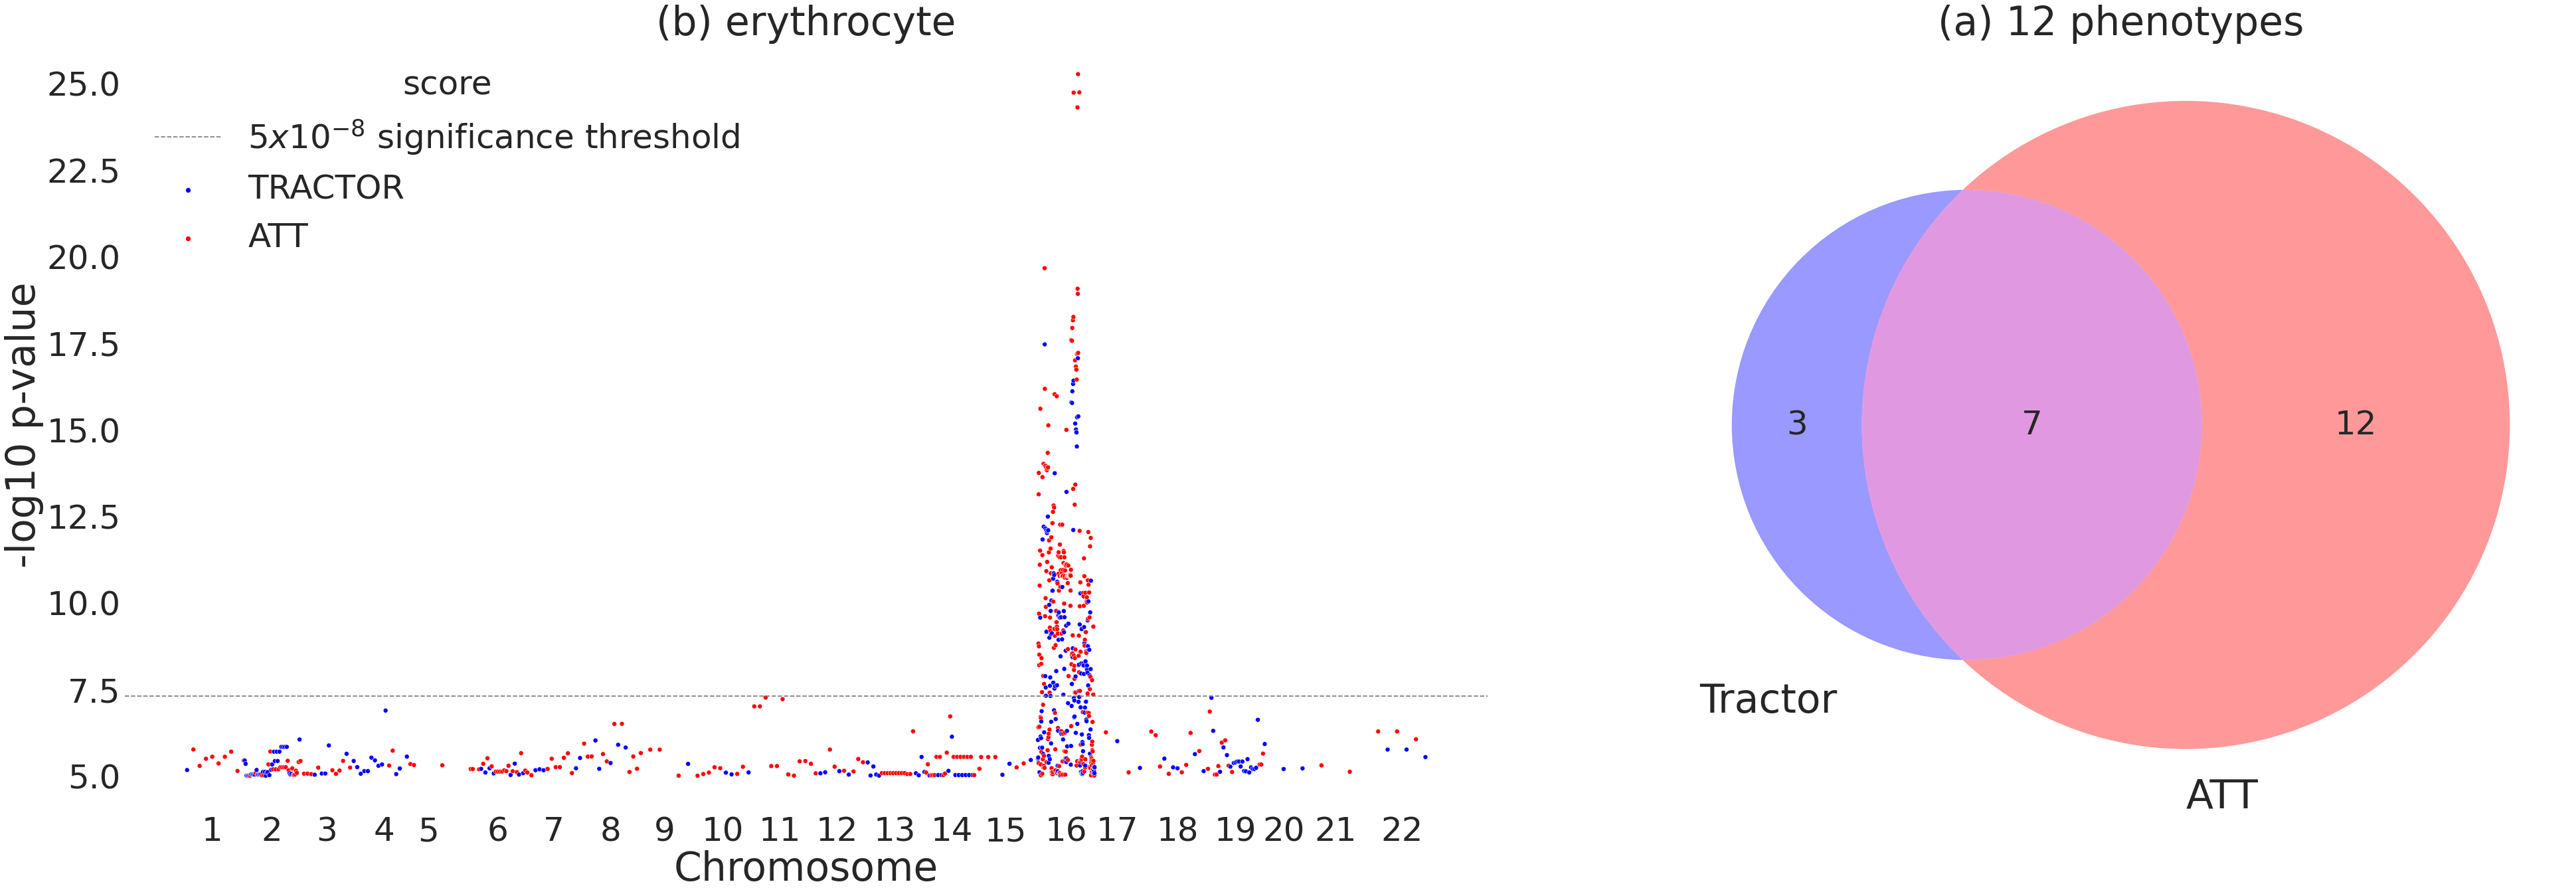

In [20]:
plt.style.use("seaborn")
size = 50
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('font', size=size) #controls default text size
plt.rc('axes', titlesize=size+10) #fontsize of the title
plt.rc('axes', labelsize=size+10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=size) #fontsize of the y tick labels
plt.rc('legend', fontsize=size) #fontsize of the legend
plt.rc('legend', edgecolor="black")
sns.set_style("white") #make background white instead of grid
#Figure 4b
n_tractor = 0
n_att = 0
phenos = ["cholesterol", "erythrocyte", "height", "LDL", "log_AST", "log_BMI", "log_HDL", "log_leukocyte", "log_lymphocyte", "log_monocyte", "log_platelet", "log_triglycerides"]

#find out how many independent shared loci exist
k_thresh = 50000
for pheno in phenos:
    n_both = 0
    tractor = pd.read_csv(f"results/{pheno}/TRACTORf.csv.gz")
    att = pd.read_csv(f"results/{pheno}/ATTf.csv.gz")
    a_index = att["pos"]
    for i in range(0, len(a_index)):
        tractor_snp = tractor[tractor["chrom"] == att["chrom"][i]]
        if len(tractor_snp) > 0:
            for j in tractor_snp["pos"]:
                if abs(j - a_index[i]) < k_thresh:
                    n_both = n_both + 1
                    break
                    
#find out how many independent individual loci exist
for pheno in phenos:
    tractor = pd.read_csv(f"{real_dir_rls}/{pheno}/TRACTORf.csv.gz")
    att = pd.read_csv(f"{real_dir_rls}/{pheno}/ATTf.csv.gz")
    if len(tractor) > 0:
        tractor = tractor[np.isfinite(tractor["TRACTOR_P"])]
        tractor = tractor[tractor["TRACTOR_P"] > 0.0]
    if len(att) > 0:
        att = att[np.isfinite(att["ATT_P"])]
        att = att[att["ATT_P"] > 0.0]
    n_att = n_att + len(att)
    n_tractor = n_tractor + len(tractor)
    
fig, axes = plt.subplots(1,2, figsize=(60, 20))

# Use the venn2 function
axes[1] = venn2(subsets = (n_tractor - n_both, n_att - n_both, n_both), set_labels = ('Tractor', 'ATT'), set_colors=('b', 'r'))
label = axes[1].get_label_by_id('A') 
label.set_x(label.get_position()[0] - 0.21)
label.set_y(label.get_position()[1] + 0.01)
plt.title("(a) 12 phenotypes")

#Figure 4a
pheno = "erythrocyte"
att = pd.read_csv(f"{real_dir_rls}/{pheno}/att_all.csv.gz")
tractor = pd.read_csv(f"{real_dir_rls}/{pheno}/tractor_all.csv.gz")
info = pd.concat([att, tractor])
sns.set_style("white")

x_labels = []
x_labels_pos = []

info2 = info.sort_values(by=["chrom", "pos"], ascending=True).reset_index()
info2["loc"] = info2.index
loc2 = []
for i in range(0, 23):
    temp = info2[info2["chrom"]==i]
    n_snp = len(temp)
    loc2 = np.append(loc2, np.array(range(0, n_snp)) / float(n_snp) + i - 1)
info2["loc2"] = loc2
group = info2[info2["chrom"] == 1]
colors, ind = np.unique(np.array(group["score"]), return_index=True)
if colors[np.argsort(ind)][0] == 'TRACTOR':
    colors[0] = "b"
else:
    colors[0] = "r"
if len(colors) > 1:
    if colors[np.argsort(ind)][1] == 'TRACTOR':
        colors[1] = "b"
    else:
        colors[1] = "r"
axes[0].axhline(y=-math.log10(5e-8), color="grey", linestyle="--", label=r"$5x10^{-8}$ significance threshold")
manhattan = sns.scatterplot(ax = axes[0], data=group, x="loc2", y="-log10p", hue = "score", palette=list(colors), legend=True)
x_labels.append(1)
x_labels_pos.append((group['loc2'].iloc[-1] - (group['loc2'].iloc[-1] - group['loc2'].iloc[0])/2))

for i in range(2, 23):
    group = info2[info2["chrom"] == i]
    colors, ind = np.unique(np.array(group["score"]), return_index=True)
    if len(colors) > 0:
        if colors[np.argsort(ind)][0] == 'TRACTOR':
            colors[0] = "b"
        else:
            colors[0] = "r"
    if len(colors) > 1:
        if colors[np.argsort(ind)][1] == 'TRACTOR':
            colors[1] = "b"
        else:
            colors[1] = "r"

    sns.scatterplot(data=group, x="loc2", y="-log10p", hue = "score", palette=list(colors), ax=manhattan, legend=False)
    if len(group) > 0:
        x_labels.append(i)
        x_labels_pos.append((group['loc2'].iloc[-1] - (group['loc2'].iloc[-1] - group['loc2'].iloc[0])/2))

manhattan.set_xticks(x_labels_pos)
manhattan.set_xticklabels(x_labels)   
axes[0].set_ylabel("-log10 p-value")
axes[0].set_xlabel("Chromosome")
axes[0].set_title(f"(b) {pheno}")
plt.tight_layout()
plt.savefig("Figure4.png")

## Numerical Information Related to Figure 4

In [15]:
info = pd.read_csv(f"{info_dir}/info_realinfo.csv.gz")
n_snp_ukbb = info["n_snp"][0]
print(f"Number of SNPs in UKBB Data: {n_snp_ukbb}")
n_indiv_ukbb = info["n_indiv"][0]
print(f"Number of Individuals in UKBB Data: {n_indiv_ukbb}")
p_1 = np.round(info["p_1"][0], 3) * 100
print(f"Average Global Ancestry Proportions in UKBB Data: {p_1}/{100-p_1}")
diffs = pd.read_csv(f"{info_dir}/info_realdiffs.csv.gz")["0"]
print(f"Mean Minor Allele Frequency Difference AFR - EUR: {np.mean(diffs)}")
print(f"Mean Absolute Minor Allele Frequency Difference: {np.mean(abs(diffs))}")
diff_std = np.std(abs(diffs))
print(f"Standard Deviation of Absolute Minor Allele Frequency Difference: {diff_std}")
n_in = 0
for diff in diffs:
    if abs(diff) < diff_std:
        n_in = n_in + 1
percent_similar = (n_in / n_snp_ukbb) * 100
print(f"Percent of SNPs roughly within one standard deviation: {percent_similar}")

Number of SNPs in UKBB Data: 16584433
Number of Individuals in UKBB Data: 4327
Average Global Ancestry Proportions in UKBB Data: 58.9/41.1
Mean Minor Allele Frequency Difference AFR - EUR: -0.02385838835997746
Mean Absolute Minor Allele Frequency Difference: 0.09589194560308013
Standard Deviation of Absolute Minor Allele Frequency Difference: 0.11530525176167324
Percent of SNPs roughly within one standard deviation: 72.76005154954649


## Supplemental Figures Related to Figure 4

### Figure S10

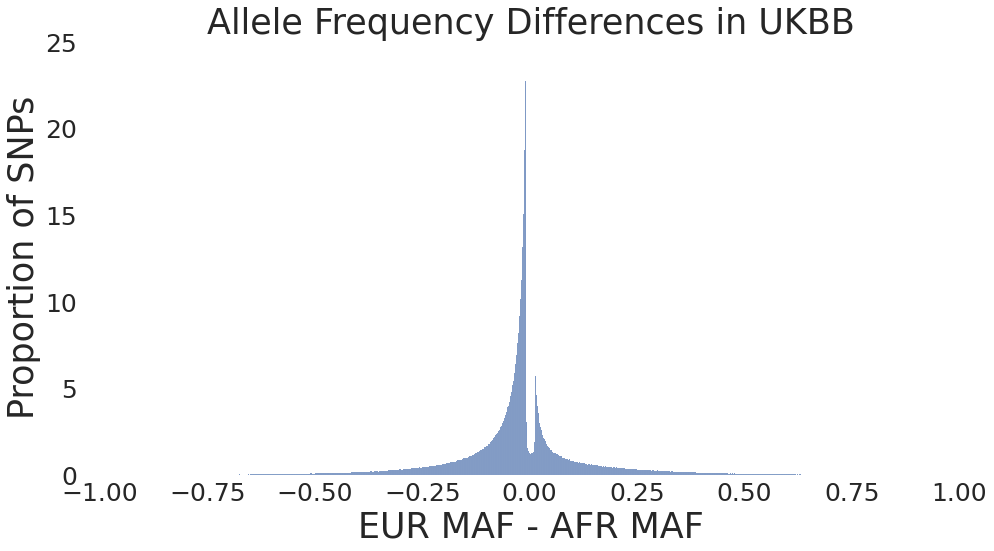

In [8]:
diffs = pd.read_csv(f"{info_dir}/info_realdiffs.csv.gz")["0"]
fig = plt.figure(figsize=(16, 8))
plot = sns.histplot(diffs, stat="density", legend=False)
plt.xlabel("EUR MAF - AFR MAF")
plt.ylabel("Proportion of SNPs")
plt.title("Allele Frequency Differences in UKBB")
plt.savefig("FigureS10.png")

### Figure S11

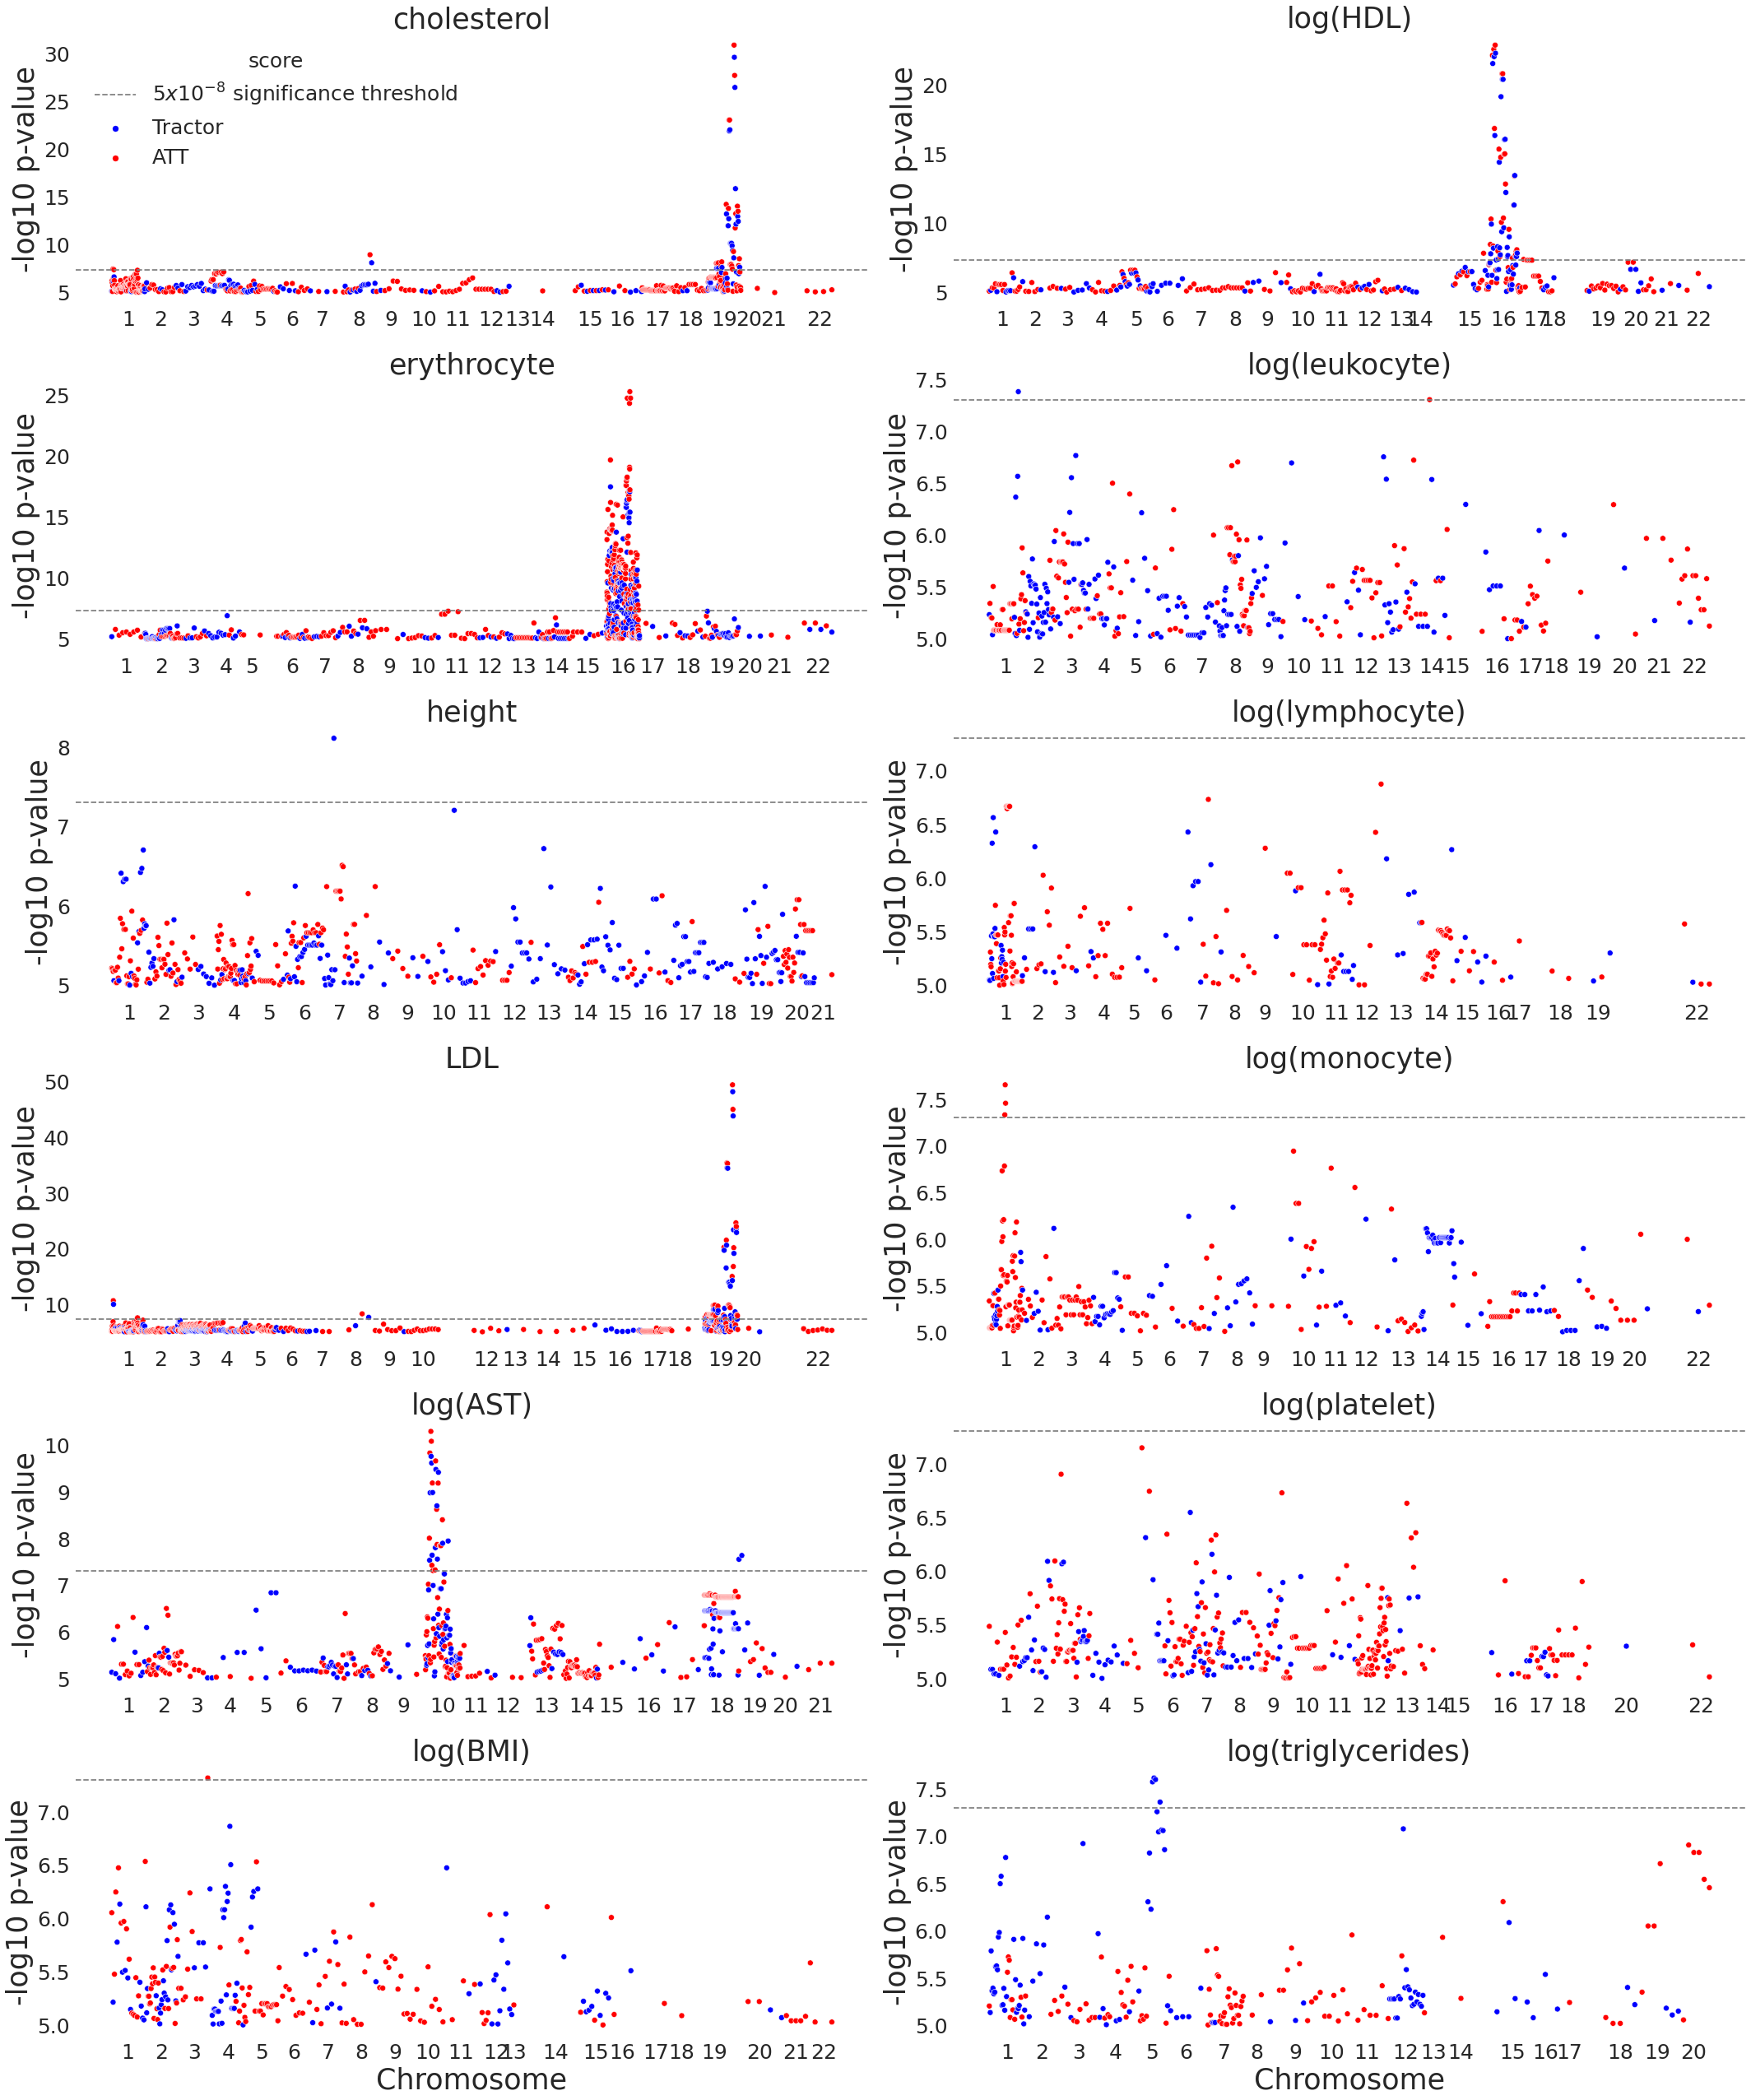

In [9]:
phenos = ["cholesterol", "erythrocyte", "height", "LDL", "log_AST", "log_BMI", "log_HDL", "log_leukocyte", "log_lymphocyte", "log_monocyte", "log_platelet", "log_triglycerides"]
fig, axes = plt.subplots(int(len(phenos) / 2),2, figsize=(30,3 * len(phenos)))
for j in range(0, len(phenos)):
    pheno = phenos[j]
    ax_index_0 = j % int((len(phenos) / 2))
    ax_index_1 = 0 if j < (len(phenos) / 2) else 1
    att = pd.read_csv(f"{real_dir_rls}/{pheno}/att_all.csv.gz")
    tractor = pd.read_csv(f"{real_dir_rls}/{pheno}/tractor_all.csv.gz")
    tractor["score"] = np.repeat("Tractor", len(tractor["score"]))
    info = pd.concat([att, tractor])
    sns.set_style("white")

    x_labels = []
    x_labels_pos = []

    info2 = info.sort_values(by=["chrom", "pos"], ascending=True).reset_index()
    info2["loc"] = info2.index
    loc2 = []
    for i in range(0, 23):
        temp = info2[info2["chrom"]==i]
        n_snp = len(temp)
        loc2 = np.append(loc2, np.array(range(0, n_snp)) / float(n_snp) + i - 1)
    info2["loc2"] = loc2
    group = info2[info2["chrom"] == 1]
    colors, ind = np.unique(np.array(group["score"]), return_index=True)
    if colors[np.argsort(ind)][0] == 'Tractor':
        colors[0] = "b"
    else:
        colors[0] = "r"
    if len(colors) > 1:
        if colors[np.argsort(ind)][1] == 'Tractor':
            colors[1] = "b"
        else:
            colors[1] = "r"
    axes[ax_index_0, ax_index_1].axhline(y=-math.log10(5e-8), color="grey", linestyle="--", label=r"$5x10^{-8}$ significance threshold")
    legend=False
    if j == 0:
        legend=True
    manhattan = sns.scatterplot(ax = axes[ax_index_0, ax_index_1], data=group, x="loc2", y="-log10p", hue = "score", palette=list(colors), legend=legend)
    x_labels.append(1)
    x_labels_pos.append((group['loc2'].iloc[-1] - (group['loc2'].iloc[-1] - group['loc2'].iloc[0])/2))

    for i in range(2, 23):
        group = info2[info2["chrom"] == i]
        colors, ind = np.unique(np.array(group["score"]), return_index=True)
        if len(colors) > 0:
            if colors[np.argsort(ind)][0] == 'Tractor':
                colors[0] = "b"
            else:
                colors[0] = "r"
        if len(colors) > 1:
            if colors[np.argsort(ind)][1] == 'Tractor':
                colors[1] = "b"
            else:
                colors[1] = "r"

        sns.scatterplot(data=group, x="loc2", y="-log10p", hue = "score", palette=list(colors), ax=manhattan, legend=False)
        if len(group) > 0:
            x_labels.append(i)
            x_labels_pos.append((group['loc2'].iloc[-1] - (group['loc2'].iloc[-1] - group['loc2'].iloc[0])/2))

    manhattan.set_xticks(x_labels_pos)
    manhattan.set_xticklabels(x_labels)   
    axes[ax_index_0, ax_index_1].set_ylabel("-log10 p-value")
    axes[ax_index_0, ax_index_1].set_xlabel("")
    disp_pheno = pheno.split("_")
    if len(disp_pheno) == 2:
        pheno = f"{disp_pheno[0]}({disp_pheno[1]})"
    axes[ax_index_0, ax_index_1].set_title(pheno)
axes[int(len(phenos) / 2) - 1, 0].set_xlabel("Chromosome")
axes[int(len(phenos) / 2) - 1, 1].set_xlabel("Chromosome")
plt.tight_layout()
plt.savefig("FigureS11.png")

### Table S1

In [61]:
k_thresh = 50000
phenos = ["cholesterol", "erythrocyte", "height", "LDL", "log_AST", "log_BMI", "log_HDL", "log_leukocyte", "log_lymphocyte", "log_monocyte", "log_platelet", "log_triglycerides"]
SNP_overlap = pd.DataFrame({"Phenotype": [], "ATT Loci": [], "Tractor Loci": [], "Overlapping Loci": []})
for pheno in phenos:
    both = 0
    tractor = pd.read_csv(f"{real_dir_rls}/{pheno}/TRACTORf.csv.gz")
    att = pd.read_csv(f"{real_dir_rls}/{pheno}/ATTf.csv.gz")
    a_index = att["pos"]
    for i in range(0, len(a_index)):
        tractor_snp = tractor[tractor["chrom"] == att["chrom"][i]]
        if len(tractor_snp) > 0:
            for j in tractor_snp["pos"]:
                if abs(j - a_index[i]) < k_thresh:
                    both = both + 1
                    break
    SNP_overlap.loc[len(SNP_overlap.index)] = [pheno, len(att), len(tractor), both]
SNP_overlap

,Phenotype,ATT Loci,Tractor Loci,Overlapping Loci
0,cholesterol,3.0,2.0,2.0
1,erythrocyte,3.0,3.0,2.0
2,height,0.0,1.0,0.0
3,LDL,4.0,3.0,3.0
4,log_AST,1.0,1.0,0.0
5,log_BMI,1.0,0.0,0.0
6,log_HDL,5.0,0.0,0.0
7,log_leukocyte,1.0,0.0,0.0
8,log_lymphocyte,0.0,0.0,0.0
9,log_monocyte,1.0,0.0,0.0


### Table S2

In [32]:
phenos = ["cholesterol", "erythrocyte", "height", "LDL", "log_AST", "log_BMI", "log_HDL", "log_leukocyte", "log_lymphocyte", "log_monocyte", "log_platelet", "log_triglycerides"]
sig_rls = pd.DataFrame()
for pheno in phenos:
    tractor = pd.read_csv(f"{real_dir_rls}/{pheno}/TRACTORf.csv.gz")[["SNP_I", "TRACTOR_P"]].copy()
    att = pd.read_csv(f"{real_dir_rls}/{pheno}/ATTf.csv.gz")[["SNP_I", "ATT_P"]].copy()
    tractor.set_index("SNP_I", inplace = True)
    att.set_index("SNP_I", inplace = True)
    merged = pd.concat([att, tractor], axis=1, join='outer')
    merged["pheno"] = np.repeat(pheno, len(merged))
    sig_rls = pd.concat([sig_rls, merged])
display(sig_rls)

,ATT_P,TRACTOR_P,pheno
SNP_I,,,
chr1:55054772:A:G,3.721104e-08,NaN,cholesterol
chr8:118543713:A:T,1.189988e-09,8.309995e-09,cholesterol
chr19:44908822:C:T,1.219164e-31,2.307361e-30,cholesterol
chr16:261108:G:A,5.440378e-26,NaN,erythrocyte
chr16:360054:A:G,9.150565e-13,NaN,erythrocyte
chr16:50884914:A:T,4.920239e-10,NaN,erythrocyte
chr16:117409:C:T,NaN,3.474482e-18,erythrocyte
chr16:260355:C:T,NaN,6.335334e-18,erythrocyte
chr16:384271:G:A,NaN,2.325699e-11,erythrocyte
